In [1]:
import sys
import scanpy as sc
import pandas as pd
import numpy as np
import os
import seaborn as sns
import gzip
import scrublet as scr
import matplotlib.pyplot as plt


sns.set_theme(style="ticks", context="notebook")


In [2]:
#import sys
#sys.path.append('../../3_preprocessing/')
from preprocessing_functions import *

/Users/amandheer/miniconda3/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/Users/amandheer/miniconda3/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/Users/amandheer/miniconda3/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/Users/amandheer/miniconda3/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/Users/amandheer/miniconda3/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_mtx from `anndata` is dep

# Specify inputs and outputs

In [3]:
os.listdir('./')

['preprocessing_functions.py',
 'thymus',
 '.DS_Store',
 'cache',
 'sample_labelling.ipynb',
 'spleen',
 '__pycache__',
 'Scrublet.ipynb',
 'abdominal_wall_merged_velocyto-Copy1 (3).ipynb',
 'abdominal_wall_merged_velocyto-Copy1 (1).ipynb',
 '.ipynb_checkpoints',
 'annotations_droplet.csv',
 '.pybiomart.sqlite',
 'bone_marrow']

In [4]:
#pp_name = 'pp_out_merged_velocyto'

In [5]:
# Declare directories for your own environment
soupx_corrected_counts_dir = '/Users/amandheer/Desktop/alignment_data'
# This directory should contain subdirectories for each tissue
cluster_corrected_counts_dir = 'Desktop/alignment_data/spleen'

# Export directory for processed data
h5ad_export_dir = '/Users/amandheer/Desktop/alignment_data/thymus'
# Name for pre-processing
pp_name = 'thymus_output'
sample_h5ad_export_dir = os.path.join(h5ad_export_dir, pp_name)

# Create export directory if not existing
if not os.path.exists(sample_h5ad_export_dir):
    os.makedirs(sample_h5ad_export_dir)

# Path to original metadata
# ori_metadata_dir = 'Desktop/alignment_data/spleen/10X_P7_2/soupx_export/obs_metadata.csv'

# Just a label for the counts source
counts_based_on = 'merged_standard_gene_output'

# List directories under soupx_corrected_counts_dir, which represent the tissues
samples = os.listdir(soupx_corrected_counts_dir)
samples.sort()

# Print the directories to verify
print("Soupx corrected counts directory:", soupx_corrected_counts_dir)
print("Export directory:", sample_h5ad_export_dir)
print("Samples detected:", samples)


Soupx corrected counts directory: /Users/amandheer/Desktop/alignment_data
Export directory: /Users/amandheer/Desktop/alignment_data/thymus/thymus_output
Samples detected: ['.DS_Store', '.ipynb_checkpoints', '.pybiomart.sqlite', 'Scrublet.ipynb', '__pycache__', 'abdominal_wall_merged_velocyto-Copy1 (1).ipynb', 'abdominal_wall_merged_velocyto-Copy1 (3).ipynb', 'annotations_droplet.csv', 'bone_marrow', 'cache', 'preprocessing_functions.py', 'sample_labelling.ipynb', 'spleen', 'thymus']


In [6]:
samples

['.DS_Store',
 '.ipynb_checkpoints',
 '.pybiomart.sqlite',
 'Scrublet.ipynb',
 '__pycache__',
 'abdominal_wall_merged_velocyto-Copy1 (1).ipynb',
 'abdominal_wall_merged_velocyto-Copy1 (3).ipynb',
 'annotations_droplet.csv',
 'bone_marrow',
 'cache',
 'preprocessing_functions.py',
 'sample_labelling.ipynb',
 'spleen',
 'thymus']

In [7]:
# EXPORT PLOTS DIRECTORY
export_plots_directory = os.path.join(sample_h5ad_export_dir, 'thymus_plots')
if not os.path.exists(export_plots_directory):
    os.makedirs(export_plots_directory)
os.path.join(export_plots_directory)

'/Users/amandheer/Desktop/alignment_data/thymus/thymus_output/thymus_plots'

# E.g. load data

In [8]:
import os
import scanpy as sc

def load_10x_data(data_dir, var_names='gene_ids'):
    """
    Load 10X Genomics data from a specified directory.
    Assumes the directory contains matrix.mtx.gz, barcodes.tsv.gz, and features.tsv.gz.
    """
    if not os.path.exists(data_dir):
        raise FileNotFoundError(f"Directory not found: {data_dir}")
    
    try:
        adata = sc.read_10x_mtx(
            data_dir,
            var_names= 'gene_ids',  # 'gene_ids' or 'gene_symbols'
            cache=True            # Cache the result for faster future loading
        )
        print(f"Data loaded from {data_dir}. Shape: {adata.shape}")
        return adata
    except Exception as e:
        raise RuntimeError(f"Failed to load data from {data_dir}: {e}")

# Paths to the directories
data_dir1 = os.path.expanduser('~/Desktop/alignment_data/thymus/10X_P7_11/soupx_export/counts')
#data_dir2 = os.path.expanduser('~/Desktop/alignment_data/bone_marrow/10X_P7_3/soupx_export/counts')

# Load the data
adata_merged = load_10x_data(data_dir1)  # Use 'gene_symbols' for annotation
#adata2 = load_10x_data(data_dir2)
# Optional: Concatenate the datasets if needed
# combined_adata = adata1.concatenate(adata2)

Data loaded from /Users/amandheer/Desktop/alignment_data/thymus/10X_P7_11/soupx_export/counts. Shape: (3346, 57010)


In [9]:
#
#metadata = pd.read_csv(metadata_path, index_col=0)
#print(f"Metadata columns: {metadata.columns}")


In [10]:
# METADATA PATH
adata_merged.var['gene_ids'] = adata_merged.var_names
soupx_corrected_counts_dir = os.path.expanduser('~/Desktop/alignment_data')  # Base directory
tissue = "thymus"  # Specify the tissue folder
sample = "10X_P7_11"     # Specify the sample folder

# Path to the obs_metadata.csv file
metadata_path = os.path.join(soupx_corrected_counts_dir, tissue, sample, 'soupx_export', 'obs_metadata.csv')

# Check if the metadata file exists
if not os.path.exists(metadata_path):
    raise FileNotFoundError(f"Metadata file not found: {metadata_path}")
    print(f"Metadata file not found for {sample}: {metadata_path}")

adata_merged.obs['pct_unspliced'] = pd.read_csv(metadata_path, index_col=0)['pct_unspliced']

print(adata_merged)

#adata2.var['gene_ids'] = adata2.var_names
#soupx_corrected_counts_dir = os.path.expanduser('~/Desktop/alignment_data')  # Base directory
#tissue = "bone_marrow"  # Specify the tissue folder
#sample = "10X_P7_3"     # Specify the sample folder

# Path to the obs_metadata.csv file
#metadata_path = os.path.join(soupx_corrected_counts_dir, tissue, sample, 'soupx_export', 'obs_metadata.csv')

# Check if the metadata file exists
#if not os.path.exists(metadata_path):
 #   raise FileNotFoundError(f"Metadata file not found: {metadata_path}")
  #  print(f"Metadata file not found for {sample}: {metadata_path}")

#adata2.obs['pct_unspliced'] = pd.read_csv(metadata_path, index_col=0)['pct_unspliced']

#print(adata2)

AnnData object with n_obs × n_vars = 3346 × 57010
    obs: 'pct_unspliced'
    var: 'gene_symbols', 'feature_types', 'gene_ids'


In [11]:
# PRINT ADATA
adata_merged.var # and adata2.obs

gene_symbols    feature_types            gene_ids
ENSMUSG00000104478             Gm38212  Gene Expression  ENSMUSG00000104478
ENSMUSG00000104385              Gm7449  Gene Expression  ENSMUSG00000104385
ENSMUSG00000086053             Gm15178  Gene Expression  ENSMUSG00000086053
ENSMUSG00000101231             Gm28283  Gene Expression  ENSMUSG00000101231
ENSMUSG00000102135             Gm37108  Gene Expression  ENSMUSG00000102135
...                                ...              ...                 ...
ENSMUSG00002074970  ENSMUSG00002074970  Gene Expression  ENSMUSG00002074970
ENSMUSG00002075729  ENSMUSG00002075729  Gene Expression  ENSMUSG00002075729
ENSMUSG00002074899  ENSMUSG00002074899  Gene Expression  ENSMUSG00002074899
ENSMUSG00002076890  ENSMUSG00002076890  Gene Expression  ENSMUSG00002076890
ENSMUSG00000095742  ENSMUSG00000095742  Gene Expression  ENSMUSG00000095742

[57010 rows x 3 columns]

In [12]:
#adata2.obs

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.49
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 2.0%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 3.0%
Elapsed time: 2.4 seconds


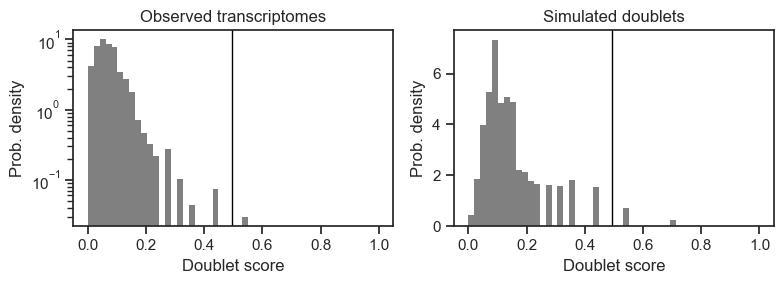

In [14]:
# SAMPLE-1 (ADATA1)
# Set expected doublet rate based on method expected doublet rate based on cells recovered / or based on literature
# https://kb.10xgenomics.com/hc/en-us/articles/360001378811-What-is-the-maximum-number-of-cells-that-can-be-profiled
adata_merged = call_scrublet(adata_merged, expected_doublet_rate = 0.05, plot_umap=False)

In [15]:
# SAMPLE-2 (ADATA2)
# Set expected doublet rate based on method expected doublet rate based on cells recovered / or based on literature
# https://kb.10xgenomics.com/hc/en-us/articles/360001378811-What-is-the-maximum-number-of-cells-that-can-be-profiled
#adata2 = call_scrublet(adata2, expected_doublet_rate = 0.05, plot_umap=False)

Detected doublet rate = 0.5%
Estimated detectable doublet fraction = 12.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 4.2%


AnnData object with n_obs × n_vars = 3346 × 57010
    obs: 'pct_unspliced', 'doublet_score', 'predicted_doublet'
    var: 'gene_symbols', 'feature_types', 'gene_ids'
    uns: 'scrublet'

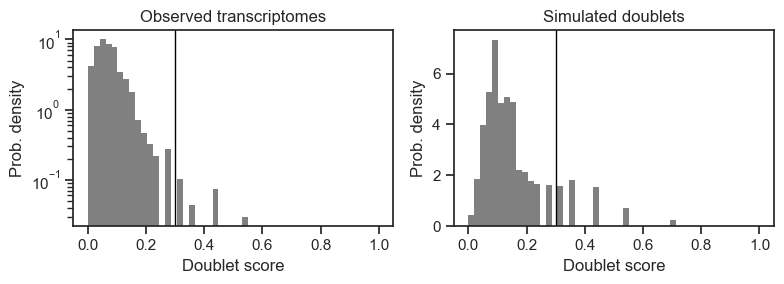

In [16]:
# one way to set threshold is to set the line between both functions
# ADATA-1
set_doublet_threshold(adata_merged, doublet_threshold = 0.30, plot_umap=False)

# or you can remove the cells with 5% highest doublet score

In [17]:
# one way to set threshold is to set the line between both functions
# ADATA-2
#set_doublet_threshold(adata2, doublet_threshold = 0.29, plot_umap=False)

# or you can remove the cells with 5% highest doublet score

after calculating doublet rate, merge together the matrices of the matching tissues.


In [18]:
# MERGE 
#adata_merged = sc.concat([adata1, adata2])

In [19]:
#import anndata as ad

#adata_merged = ad.concat([adata1, adata2], join='outer', merge='same')

In [27]:
print(adata_merged)

AnnData object with n_obs × n_vars = 3346 × 57010
    obs: 'pct_unspliced', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'total_counts_pl', 'log1p_total_counts_pl', 'pct_counts_pl', 'ori_barcode', 'barcode'
    var: 'gene_symbols', 'feature_types', 'gene_ids', 'hsapiens_orthologs_id', 'hsapiens_orthologs_name', 'mt', 'ribo', 'tf', 'hb', 'pl', 'rRNA', 'chromosome_loc', 'pcg', 'exc', 'cyt', 'mem', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'scrublet'


In [28]:
print(adata_merged.obs['class_label'].head())

KeyError: 'class_label'

In [23]:
sample_name = '10X_P7_11' 
adata_merged.obs["ori_barcode"] = adata_merged.obs.index

adata_merged.obs["barcode"] = sample_name + "_" + adata_merged.obs.index

In [24]:
#sample_name = '10X_P7_3' 
#adata2.obs["ori_barcode"] = adata2.obs.index

#adata2.obs["barcode"] = sample_name + "_" + adata2.obs.index

In [25]:
organism = 'mmusculus'

In [26]:
organism = 'mmusculus'
adata_merged.var['gene_ids'] = adata_merged.var_names

adata_merged = label_hs_orthologs(adata_merged, organism=organism,
                           server='http://feb2023.archive.ensembl.org/', #this is 109 ensembl
                           mart='ENSEMBL_MART_ENSEMBL')
adata_merged = get_ensemble_labels(adata_merged, organism=organism + '_gene_ensembl',
                                        server='http://feb2023.archive.ensembl.org/',
                                        mart='ENSEMBL_MART_ENSEMBL',
                                        extended_labeling=True,
                                        include_cell_cycle=False)

# Calculate QC metrics
sc.pp.calculate_qc_metrics(adata_merged, qc_vars=["mt", "ribo", "hb", "pl"],
                       inplace=True, percent_top=[20], log1p=True)

In [914]:
#organism = 'mmusculus'
#adata2.var['gene_ids'] = adata2.var_names

#adata2 = label_hs_orthologs(adata2, organism=organism,
#                           server='http://feb2023.archive.ensembl.org/', #this is 109 ensembl
#                           mart='ENSEMBL_MART_ENSEMBL')
#adata2 = get_ensemble_labels(adata2, organism=organism + '_gene_ensembl',
#                                       mart='ENSEMBL_MART_ENSEMBL',
 #                                       extended_labeling=True,
  #                                      include_cell_cycle=False)

# Calculate QC metrics
#sc.pp.calculate_qc_metrics(adata2, qc_vars=["mt", "ribo", "hb", "pl"],
 #                      inplace=True, percent_top=[20], log1p=True)

# Import data (not running this)

- I settle tissue, each tissue has many samples. 
- loading sequentially all samples

In [55]:
adatas = {}

for sample in samples: 
    counts_path = os.path.join(soupx_corrected_counts_dir, sample, "counts")
    if os.path.isdir(counts_path):  
        print(f"Processing counts data for sample: {sample}")
        adata = sc.read_10x_mtx(path=counts_path, var_names='gene_ids', make_unique=False, cache=False)
        adata.var['gene_ids'] = adata.var_names

        
        metadata_path = os.path.join(soupx_corrected_counts_dir, sample, 'obs_metadata.csv')
        if os.path.exists(metadata_path):
            metadata = pd.read_csv(metadata_path, index_col=0)
            adata.obs['pct_unspliced'] = metadata['pct_unspliced']

        adatas[sample] = adata.copy()
    else:
        print(f"Skipping invalid counts directory: {counts_path}")


Skipping invalid counts directory: /Users/amandheer/Desktop/alignment_data/.DS_Store/counts
Skipping invalid counts directory: /Users/amandheer/Desktop/alignment_data/.ipynb_checkpoints/counts
Skipping invalid counts directory: /Users/amandheer/Desktop/alignment_data/.pybiomart.sqlite/counts
Skipping invalid counts directory: /Users/amandheer/Desktop/alignment_data/Scrublet.ipynb/counts
Skipping invalid counts directory: /Users/amandheer/Desktop/alignment_data/__pycache__/counts
Skipping invalid counts directory: /Users/amandheer/Desktop/alignment_data/abdominal_wall_merged_velocyto-Copy1 (1).ipynb/counts
Skipping invalid counts directory: /Users/amandheer/Desktop/alignment_data/bone_marrow/counts
Skipping invalid counts directory: /Users/amandheer/Desktop/alignment_data/preprocessing_functions.py/counts
Skipping invalid counts directory: /Users/amandheer/Desktop/alignment_data/spleen/counts
Skipping invalid counts directory: /Users/amandheer/Desktop/alignment_data/thymus/counts


In [56]:
samples = list(adatas.keys())

df = pd.DataFrame(index=samples, columns=samples)

for sample_x in samples:
    for sample_y in samples:
        x_in_y = sum(adatas[sample_x].obs_names.isin(adatas[sample_y].obs_names))
        total_x = len(adatas[sample_x].obs_names)

        overlap_pct = x_in_y / total_x if total_x > 0 else 0
        df.loc[sample_x, sample_y] = overlap_pct

df = df.astype(float)

if df.empty or df.isnull().all().all():
    print("DataFrame is empty or contains only NaN values. Cannot plot heatmap.")
else:
    sns.heatmap(df, cmap="YlGnBu", annot=False, cbar=True)
    plt.title("Sample Overlap Heatmap")
    plt.show()

print("Overlap DataFrame:")
print(df)


DataFrame is empty or contains only NaN values. Cannot plot heatmap.
Overlap DataFrame:
Empty DataFrame
Columns: []
Index: []


Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.24
Detected doublet rate = 5.0%
Estimated detectable doublet fraction = 53.9%
Overall doublet rate:
	Expected   = 7.0%
	Estimated  = 9.2%
Elapsed time: 21.3 seconds


C:\ProgramData\miniconda3\envs\myenv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Keys in adata.uns for sample L8TX_210107_01_H08: ['scrublet']
                  doublet_score  predicted_doublet
AAACCCAAGGCCTTGC       0.022881              False
AAACCCAAGTTCATGC       0.044797              False
AAACCCACACGTACAT       0.093590              False
AAACCCACACTGCTTC       0.167542              False
AAACCCACATGTGACT       0.099804              False


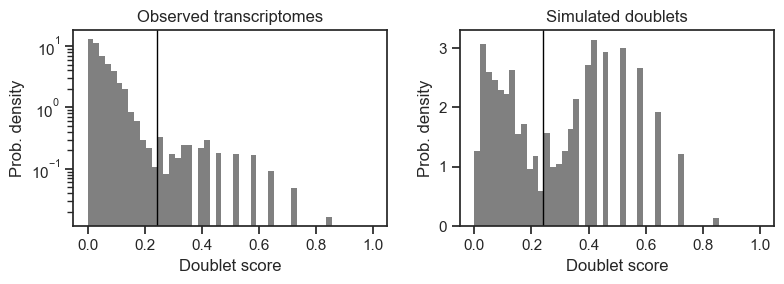

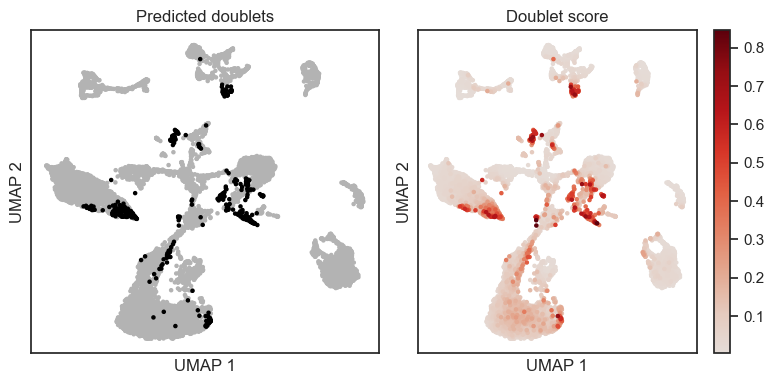

In [24]:
sample = 'L8TX_210107_01_H08' 
adatas[sample] = call_scrublet(adatas[sample], expected_doublet_rate=0.07)
print(f"Keys in adata.uns for sample {sample}: {list(adatas[sample].uns.keys())}")
print(adatas[sample].obs[['doublet_score', 'predicted_doublet']].head())

In [25]:
id_to_genename_dict = adatas[sample].var['gene_symbols'].to_dict()

Detected doublet rate = 2.6%
Estimated detectable doublet fraction = 48.5%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 5.4%


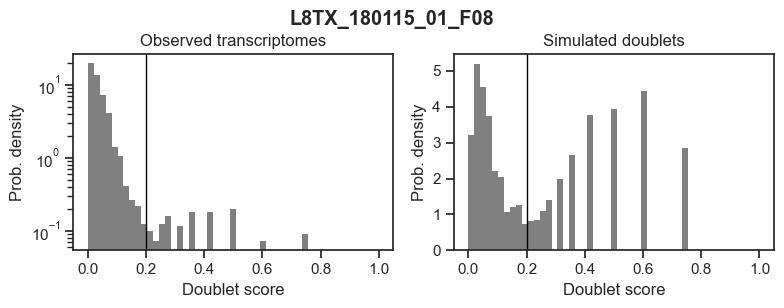

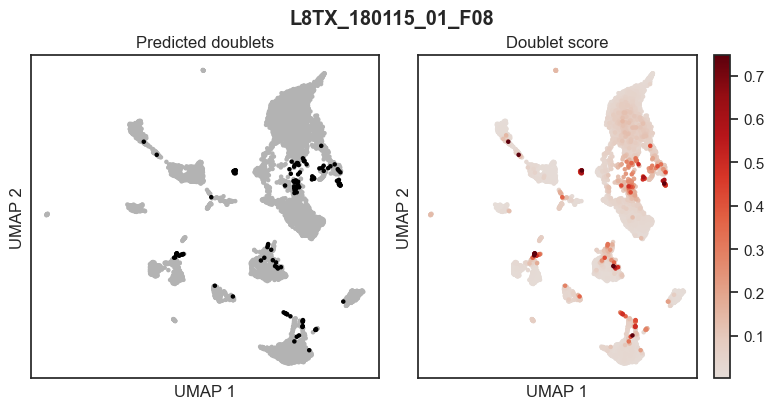

Scrublet plot saved for sample L8TX_180115_01_F08 at E:\emilio\processed_by_sample\L8TX_180115_01_F08\plots\L8TX_180115_01_F08_scrublet_plot.pdf


In [73]:
sample = 'L8TX_180115_01_F08'  

sample_h5ad_export_dir = os.path.join(h5ad_export_dir, sample)
os.makedirs(sample_h5ad_export_dir, exist_ok=True) 

export_plots_directory = os.path.join(sample_h5ad_export_dir, 'plots')
os.makedirs(export_plots_directory, exist_ok=True)  

output_pdf_path = os.path.join(export_plots_directory, f'{sample}_scrublet_plot.pdf')

with save_plots_to_pdf(output_pdf_path):
    adatas[sample] = set_doublet_threshold(adatas[sample], doublet_threshold=0.20, plot_title=sample)

print(f"Scrublet plot saved for sample {sample} at {output_pdf_path}")



Processing sample: L8TX_210107_01_C08
Detected doublet rate = 6.9%
Estimated detectable doublet fraction = 51.8%
Overall doublet rate:
	Expected   = 8.0%
	Estimated  = 13.4%


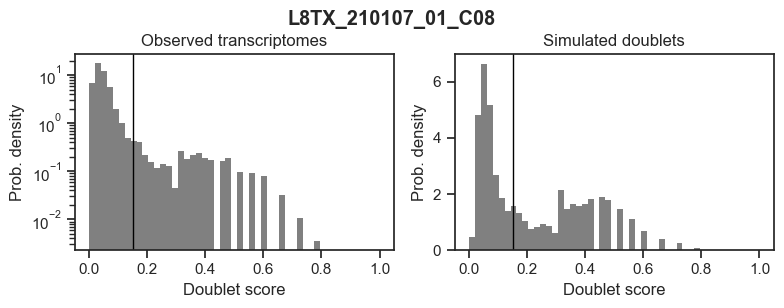

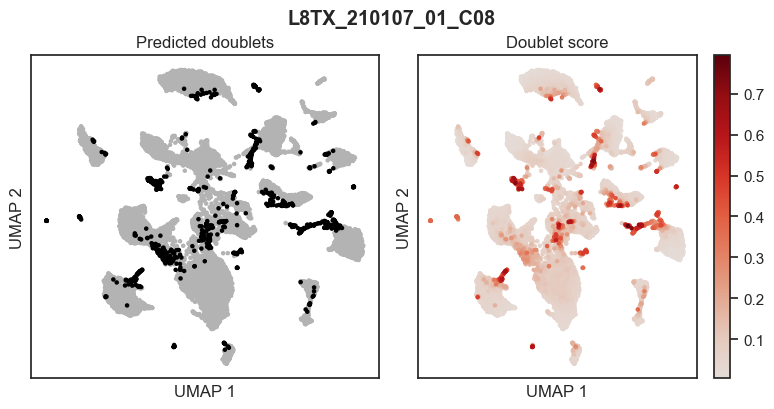

Scrublet plot saved for sample L8TX_210107_01_C08 at E:\emilio\processed_by_sample\L8TX_210107_01_C08\plots\L8TX_210107_01_C08_scrublet_plot.pdf

Processing sample: L8TX_210107_01_F09
Detected doublet rate = 6.3%
Estimated detectable doublet fraction = 44.4%
Overall doublet rate:
	Expected   = 8.0%
	Estimated  = 14.2%


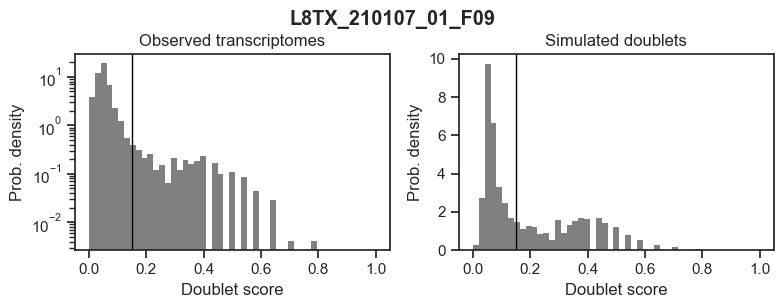

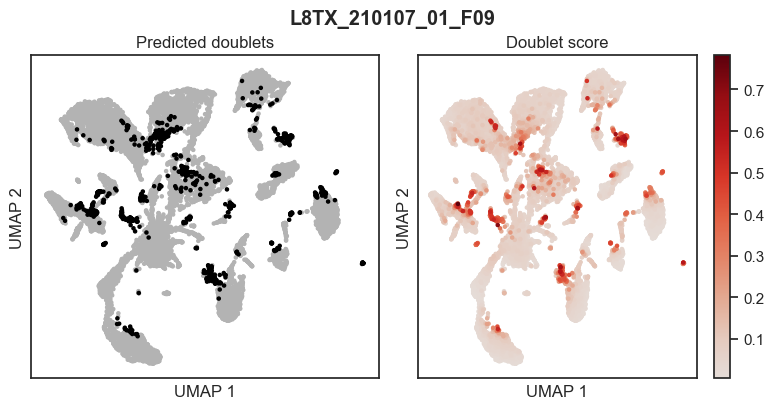

Scrublet plot saved for sample L8TX_210107_01_F09 at E:\emilio\processed_by_sample\L8TX_210107_01_F09\plots\L8TX_210107_01_F09_scrublet_plot.pdf

Processing sample: L8TX_210107_01_G09
Detected doublet rate = 5.3%
Estimated detectable doublet fraction = 60.2%
Overall doublet rate:
	Expected   = 7.0%
	Estimated  = 8.9%


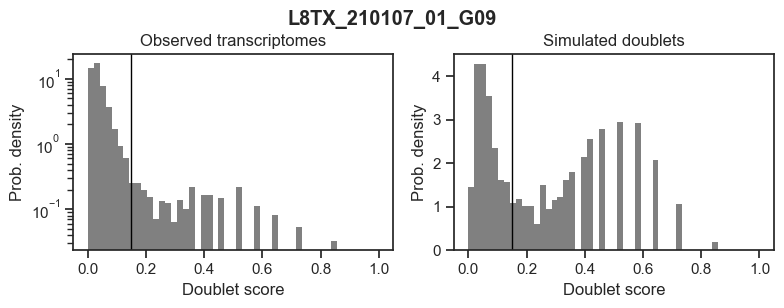

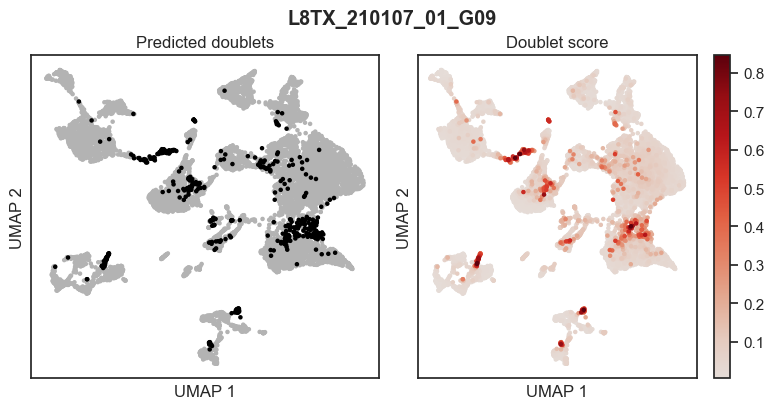

Scrublet plot saved for sample L8TX_210107_01_G09 at E:\emilio\processed_by_sample\L8TX_210107_01_G09\plots\L8TX_210107_01_G09_scrublet_plot.pdf

Processing sample: L8TX_210107_01_H08
Detected doublet rate = 8.5%
Estimated detectable doublet fraction = 65.1%
Overall doublet rate:
	Expected   = 7.0%
	Estimated  = 13.1%


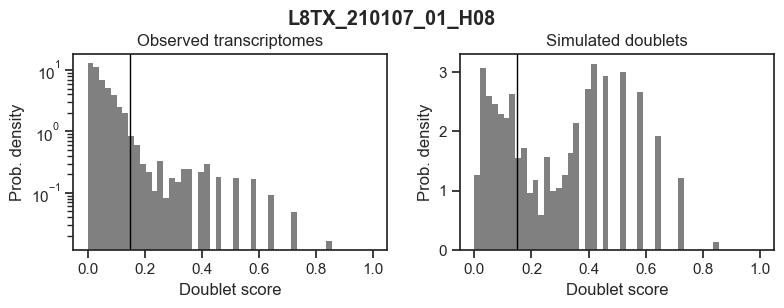

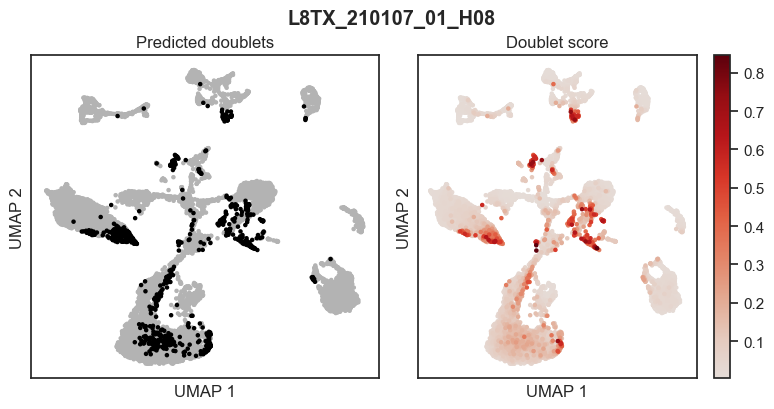

Scrublet plot saved for sample L8TX_210107_01_H08 at E:\emilio\processed_by_sample\L8TX_210107_01_H08\plots\L8TX_210107_01_H08_scrublet_plot.pdf


In [26]:
for sample in samples:
    print(f"\nProcessing sample: {sample}")
    
    sample_h5ad_export_dir = os.path.join(h5ad_export_dir, sample)
    os.makedirs(sample_h5ad_export_dir, exist_ok=True) 

    export_plots_directory = os.path.join(sample_h5ad_export_dir, 'plots')
    os.makedirs(export_plots_directory, exist_ok=True) 

    output_pdf_path = os.path.join(export_plots_directory, f'{sample}_scrublet_plot.pdf')

    try:
        with save_plots_to_pdf(output_pdf_path):
            adatas[sample] = set_doublet_threshold(adatas[sample], doublet_threshold=0.15, plot_title=sample)
        print(f"Scrublet plot saved for sample {sample} at {output_pdf_path}")
    except Exception as e:
        print(f"Error processing sample {sample}: {e}")



In [27]:
ori_metadata_path = os.path.join(ori_metadata_dir, "cell_metadata.csv")
print(f"Loading metadata from {ori_metadata_path}")

try:
    ori_metadata = pd.read_csv(ori_metadata_path)
    print("Metadata loaded successfully!")
    #print(ori_metadata.head()) 
    print(ori_metadata.columns)
except FileNotFoundError:
    raise FileNotFoundError(f"Metadata file not found: {ori_metadata_path}")
except Exception as e:
    raise RuntimeError(f"Error loading metadata: {e}")


Loading metadata from E:\emilio\cell_metadata.csv
Metadata loaded successfully!
Index(['cell_label', 'cell_barcode', 'barcoded_cell_sample_label',
       'library_label', 'feature_matrix_label', 'entity',
       'brain_section_label', 'library_method', 'region_of_interest_acronym',
       'donor_label', 'donor_genotype', 'donor_sex', 'dataset_label', 'x', 'y',
       'cluster_alias'],
      dtype='object')


In [22]:
ori_metadata

cell_label      cell_barcode  \
0         GCGAGAAGTTAAGGGC-410_B05  GCGAGAAGTTAAGGGC   
1         AATGGCTCAGCTCCTT-411_B06  AATGGCTCAGCTCCTT   
2         AACACACGTTGCTTGA-410_B05  AACACACGTTGCTTGA   
3         CACAGATAGAGGCGGA-410_A05  CACAGATAGAGGCGGA   
4         AAAGTGAAGCATTTCG-410_B05  AAAGTGAAGCATTTCG   
...                            ...               ...   
4042971  GTGTGAGCAAACGCGA-1350_C05  GTGTGAGCAAACGCGA   
4042972  TTAGCAATCCCTGTTA-1350_C05  TTAGCAATCCCTGTTA   
4042973  TTTGGCTGTCGCGCAA-1350_C05  TTTGGCTGTCGCGCAA   
4042974  ATCCACCTCACAGACT-1320_B04  ATCCACCTCACAGACT   
4042975  TCGTTAGCATTGTCCT-1320_B04  TCGTTAGCATTGTCCT   

        barcoded_cell_sample_label       library_label feature_matrix_label  \
0                          410_B05  L8TX_201030_01_C12        WMB-10Xv3-HPF   
1                          411_B06  L8TX_201029_01_E10        WMB-10Xv3-HPF   
2                          410_B05  L8TX_201030_01_C12        WMB-10Xv3-HPF   
3                          410_A05  L8TX_201029_01_A10        WMB-10Xv3-HPF   
4                          410_B05  L8TX_201030_01_C12        WMB-10Xv3-HPF   
...                            ...                 ...                  ...   
4042971                   1350_C05  L8XR_220728_01_A05         WMB-10XMulti   
4042972                   1350_C05  L8XR_220728_01_A05         WMB-10XMulti   
4042973                   1350_C05  L8XR_220728_01_A05         WMB-10XMulti   
4042974                   1320_B04  L8XR_220630_02_B10         WMB-10XMulti   
4042975                   1320_B04  L8XR_220630_02_B10         WMB-10XMulti   

        entity  brain_section_label library_method region_of_interest_acronym  \
0         cell                  NaN          10Xv3                        RHP   
1         cell                  NaN          10Xv3                        RHP   
2         cell                  NaN          10Xv3                        RHP   
3         cell                  NaN          10Xv3                        RHP   
4         cell                  NaN          10Xv3                        RHP   
...        ...                  ...            ...                        ...   
4042971   cell                  NaN   10xRSeq_Mult                         MB   
4042972   cell                  NaN   10xRSeq_Mult                         MB   
4042973   cell                  NaN   10xRSeq_Mult                         MB   
4042974   cell                  NaN   10xRSeq_Mult                        OLF   
4042975   cell                  NaN   10xRSeq_Mult                        OLF   

                          donor_label    donor_genotype donor_sex  \
0        Snap25-IRES2-Cre;Ai14-550850  Ai14(RCL-tdT)/wt         F   
1        Snap25-IRES2-Cre;Ai14-550851  Ai14(RCL-tdT)/wt         F   
2        Snap25-IRES2-Cre;Ai14-550850  Ai14(RCL-tdT)/wt         F   
3        Snap25-IRES2-Cre;Ai14-550850  Ai14(RCL-tdT)/wt         F   
4        Snap25-IRES2-Cre;Ai14-550850  Ai14(RCL-tdT)/wt         F   
...                               ...               ...       ...   
4042971                C57BL6J-641405             wt/wt         M   
4042972                C57BL6J-641405             wt/wt         M   
4042973                C57BL6J-641405             wt/wt         M   
4042974                C57BL6J-625156             wt/wt         F   
4042975                C57BL6J-625156             wt/wt         F   

        dataset_label          x          y  cluster_alias  
0           WMB-10Xv3  23.146826  -3.086639              1  
1           WMB-10Xv3  23.138481  -3.022000              1  
2           WMB-10Xv3  23.472557  -2.992709              1  
3           WMB-10Xv3  23.379622  -3.043442              1  
4           WMB-10Xv3  23.909480  -2.601536              1  
...               ...        ...        ...            ...  
4042971  WMB-10XMulti  -7.716915   0.223654           8861  
4042972  WMB-10XMulti  -3.115098  -3.024478           8215  
4042973  WMB-10XMulti  -7.950964   0.409335        

In [28]:
for sample, adata in adatas.items():
    adata.obs.index = adata.obs.index.str.split('_').str[-1]
    print(f"Restored obs.index for sample {sample}: {adata.obs.index[:5]}")

ori_metadata['cell_barcode'] = ori_metadata['cell_barcode'].str.split('_').str[-1]
print("Restored cell_barcode in metadata:")
print(ori_metadata['cell_barcode'].head())


Restored obs.index for sample L8TX_210107_01_C08: Index(['AAACCCAAGACATCAA', 'AAACCCAAGTAGGAAG', 'AAACCCACAACGTTAC',
       'AAACCCACAGAGTTCT', 'AAACCCACATCCTATT'],
      dtype='object')
Restored obs.index for sample L8TX_210107_01_F09: Index(['AAACCCAAGAACAAGG', 'AAACCCAAGAGGACTC', 'AAACCCAAGCATGAAT',
       'AAACCCAAGCATTTGC', 'AAACCCAAGCTGTGCC'],
      dtype='object')
Restored obs.index for sample L8TX_210107_01_G09: Index(['AAACCCAAGAGGATCC', 'AAACCCAAGCTTTCTT', 'AAACCCAAGGCCTTGC',
       'AAACCCAAGTGGTTGG', 'AAACCCACAATGGCAG'],
      dtype='object')
Restored obs.index for sample L8TX_210107_01_H08: Index(['AAACCCAAGGCCTTGC', 'AAACCCAAGTTCATGC', 'AAACCCACACGTACAT',
       'AAACCCACACTGCTTC', 'AAACCCACATGTGACT'],
      dtype='object')
Restored cell_barcode in metadata:
0    GCGAGAAGTTAAGGGC
1    AATGGCTCAGCTCCTT
2    AACACACGTTGCTTGA
3    CACAGATAGAGGCGGA
4    AAAGTGAAGCATTTCG
Name: cell_barcode, dtype: object


In [29]:

for sample, adata in adatas.items():
    adata.obs.index = [f"{sample}_{cb}" for cb in adata.obs.index]
    print(f"Updated obs.index for sample {sample}: {adata.obs.index[:5]}")

ori_metadata['cell_barcode'] = ori_metadata['library_label'] + '_' + ori_metadata['cell_barcode']
print("Updated cell_barcode in metadata:")
print(ori_metadata['cell_barcode'].head())

merged_obs_names = []
for sample, adata in adatas.items():
    merged_obs_names.extend(adata.obs_names)

total_duplicates = len(merged_obs_names) - len(set(merged_obs_names))
print(f"Across all samples, there are {total_duplicates} duplicated entries.")


Updated obs.index for sample L8TX_210107_01_C08: Index(['L8TX_210107_01_C08_AAACCCAAGACATCAA',
       'L8TX_210107_01_C08_AAACCCAAGTAGGAAG',
       'L8TX_210107_01_C08_AAACCCACAACGTTAC',
       'L8TX_210107_01_C08_AAACCCACAGAGTTCT',
       'L8TX_210107_01_C08_AAACCCACATCCTATT'],
      dtype='object')
Updated obs.index for sample L8TX_210107_01_F09: Index(['L8TX_210107_01_F09_AAACCCAAGAACAAGG',
       'L8TX_210107_01_F09_AAACCCAAGAGGACTC',
       'L8TX_210107_01_F09_AAACCCAAGCATGAAT',
       'L8TX_210107_01_F09_AAACCCAAGCATTTGC',
       'L8TX_210107_01_F09_AAACCCAAGCTGTGCC'],
      dtype='object')
Updated obs.index for sample L8TX_210107_01_G09: Index(['L8TX_210107_01_G09_AAACCCAAGAGGATCC',
       'L8TX_210107_01_G09_AAACCCAAGCTTTCTT',
       'L8TX_210107_01_G09_AAACCCAAGGCCTTGC',
       'L8TX_210107_01_G09_AAACCCAAGTGGTTGG',
       'L8TX_210107_01_G09_AAACCCACAATGGCAG'],
      dtype='object')
Updated obs.index for sample L8TX_210107_01_H08: Index(['L8TX_210107_01_H08_AAACCCAAGGCCTTGC',

In [155]:
sample = 'L8TX_180115_01_B08'

adata_barcodes = adatas[sample].obs.index
print(f"Number of barcodes in adata for {sample}: {len(adata_barcodes)}")
print(f"First 5 barcodes in adata: {adata_barcodes[:5]}")

metadata_barcodes = ori_metadata[ori_metadata['library_label'] == sample]['cell_barcode']
print(f"Number of barcodes in metadata for {sample}: {len(metadata_barcodes)}")
print(f"First 5 barcodes in metadata: {metadata_barcodes.head()}")

common_barcodes = set(adata_barcodes).intersection(set(metadata_barcodes))
adata_missing_in_metadata = set(adata_barcodes) - set(metadata_barcodes)
metadata_missing_in_adata = set(metadata_barcodes) - set(adata_barcodes)

print(f"Number of common barcodes: {len(common_barcodes)}")
print(f"Number of barcodes in adata but not in metadata: {len(adata_missing_in_metadata)}")
print(f"Number of barcodes in metadata but not in adata: {len(metadata_missing_in_adata)}")

print(f"Barcodes in adata but not in metadata (first 10): {list(adata_missing_in_metadata)[:10]}")
print(f"Barcodes in metadata but not in adata (first 10): {list(metadata_missing_in_adata)[:10]}")
metadata_barcodes_with_prefix = ori_metadata[ori_metadata['library_label'] == sample]['cell_barcode']

print(f"First 5 metadata barcodes with prefix for sample {sample}:")
print(metadata_barcodes_with_prefix.head())

prefix = f"{sample}_"
if not all(metadata_barcodes_with_prefix.str.startswith(prefix)):
    print(f"Metadata barcodes are missing the prefix: {prefix}")
else:
    print(f"Metadata barcodes for sample {sample} are correctly prefixed.")


Number of barcodes in adata for L8TX_180115_01_B08: 7710
First 5 barcodes in adata: Index(['L8TX_180115_01_B08_AAACCTGAGGCATGTG',
       'L8TX_180115_01_B08_AAACCTGAGTGAATTG',
       'L8TX_180115_01_B08_AAACCTGCAAGCCATT',
       'L8TX_180115_01_B08_AAACCTGCATAAGACA',
       'L8TX_180115_01_B08_AAACCTGCATCCCATC'],
      dtype='object')
Number of barcodes in metadata for L8TX_180115_01_B08: 246
First 5 barcodes in metadata: 2380176    L8TX_180115_01_B08_ACGCCAGCATCGACGC
2400817    L8TX_180115_01_B08_GCGCGATAGCACCGCT
2427131    L8TX_180115_01_B08_GCAAACTAGATCTGAA
2428219    L8TX_180115_01_B08_ATCCGAATCCTCAACC
2428488    L8TX_180115_01_B08_CTGAAACGTAGGCATG
Name: cell_barcode, dtype: object
Number of common barcodes: 246
Number of barcodes in adata but not in metadata: 7464
Number of barcodes in metadata but not in adata: 0
Barcodes in adata but not in metadata (first 10): ['L8TX_180115_01_B08_CACAGGCGTAATAGCA', 'L8TX_180115_01_B08_CCTAGCTGTGATGCCC', 'L8TX_180115_01_B08_GGCGTGTCAAAGGCGT', '

In [78]:
organism = 'mmusculus'
ori_metadata_path = os.path.join(ori_metadata_dir, "cell_metadata.csv")
ori_metadata = pd.read_csv(ori_metadata_path)
adata_list = []

for sample, adata in adatas.items():
    print(f"Processing sample: {sample}")

    if not all(adata.obs.index.str.startswith(sample)):
        adata.obs.index = [f"{sample}_{cb}" for cb in adata.obs.index]
        print(f"Updated obs.index for sample {sample}: {adata.obs.index[:5]}")
    else:
        print(f"Sample prefix already present in obs.index for sample {sample}.")

    tmp_labels = ori_metadata[ori_metadata['library_label'] == sample].copy()
    if tmp_labels.empty:
        print(f"No metadata found for sample {sample}. Skipping...")
        continue

    tmp_labels['cell_barcode'] = [f"{sample}_{cb}" for cb in tmp_labels['cell_barcode']]
    tmp_labels = tmp_labels.set_index('cell_barcode')
    tmp_labels = tmp_labels.add_prefix('ref_')

    overlapping_columns = set(adata.obs.columns) & set(tmp_labels.columns)
    if overlapping_columns:
        print(f"Removing overlapping columns: {overlapping_columns}")
        adata.obs = adata.obs.drop(columns=list(overlapping_columns), errors='ignore')

    adata.obs = pd.merge(adata.obs, tmp_labels, left_index=True, right_index=True, how='left')

    print(f"Sample {sample} merged metadata shape: {adata.obs.shape}")
    print(adata.obs.head())

    adata_list.append(adata)


Processing sample: L8TX_171120_01_E07
Sample prefix already present in obs.index for sample L8TX_171120_01_E07.
Removing overlapping columns: {'ref_cell_label', 'ref_donor_label', 'ref_x', 'ref_donor_genotype', 'ref_y', 'ref_entity', 'ref_library_label', 'ref_region_of_interest_acronym', 'ref_brain_section_label', 'ref_dataset_label', 'ref_library_method', 'ref_feature_matrix_label', 'ref_donor_sex', 'ref_cluster_alias', 'ref_barcoded_cell_sample_label'}
Sample L8TX_171120_01_E07 merged metadata shape: (7656, 18)
                                     pct_unspliced  doublet_score  \
L8TX_171120_01_E07_AAACCTGAGATTACCC      33.574208       0.124040   
L8TX_171120_01_E07_AAACCTGAGGCATGGT      22.804878       0.017991   
L8TX_171120_01_E07_AAACCTGAGTATTGGA      27.340032       0.069279   
L8TX_171120_01_E07_AAACCTGAGTCATGCT      39.152017       0.027978   
L8TX_171120_01_E07_AAACCTGCAAGTCTAC      37.830147       0.004329   

                                     predicted_doublet  \
L8TX_171

In [30]:
organism = 'mmusculus'
ori_metadata_path = os.path.join(ori_metadata_dir, "cell_metadata.csv")
annotation_path = os.path.join(ori_metadata_dir, "VISp_metadata.csv") 
ori_metadata = pd.read_csv(ori_metadata_path)
annotation_df = pd.read_csv(annotation_path)

annotation_df["processed_sample_id"] = annotation_df["sample_id"].apply(
    lambda x: "_".join(reversed(x.split("-")[:2]))
)
annotation_df = annotation_df.set_index("processed_sample_id")

adata_list = []

for sample, adata in adatas.items():
    print(f"Processing sample: {sample}")

    if not all(adata.obs.index.str.startswith(sample)):
        adata.obs.index = [f"{sample}_{cb}" for cb in adata.obs.index]
        print(f"Updated obs.index for sample {sample}: {adata.obs.index[:5]}")
    else:
        print(f"Sample prefix already present in obs.index for sample {sample}.")

    tmp_labels = ori_metadata[ori_metadata['library_label'] == sample].copy()
    if tmp_labels.empty:
        print(f"No metadata found for sample {sample}. Skipping...")
        continue

    tmp_labels['cell_barcode'] = [f"{sample}_{cb}" for cb in tmp_labels['cell_barcode']]
    tmp_labels = tmp_labels.set_index('cell_barcode')
    tmp_labels = tmp_labels.add_prefix('ref_')

    overlapping_columns = set(adata.obs.columns) & set(tmp_labels.columns)
    if overlapping_columns:
        print(f"Removing overlapping columns: {overlapping_columns}")
        adata.obs = adata.obs.drop(columns=list(overlapping_columns), errors='ignore')
        
    adata.obs = pd.merge(adata.obs, tmp_labels, left_index=True, right_index=True, how='left')
    print(f"Sample {sample} merged metadata shape: {adata.obs.shape}")

    columns_to_merge = [
        "cluster_id_label", "supertype_label",
        "subclass_label", "class_label", 
        "neighborhood", "nt_type_label"
         ]
    if annotation_df.index.isin(adata.obs.index).any():
        adata.obs = pd.merge(adata.obs, annotation_df[columns_to_merge], left_index=True, right_index=True, how='left')
        print(f"Sample {sample} merged with new annotation. New shape: {adata.obs.shape}")
    else:
        print(f"No matching annotation data found for sample {sample}.")

    print(adata.obs.head())

    adata_list.append(adata)


Processing sample: L8TX_210107_01_C08
Sample prefix already present in obs.index for sample L8TX_210107_01_C08.
Sample L8TX_210107_01_C08 merged metadata shape: (14052, 18)
Sample L8TX_210107_01_C08 merged with new annotation. New shape: (14052, 24)
                                     pct_unspliced  doublet_score  \
L8TX_210107_01_C08_AAACCCAAGACATCAA      16.587678       0.025350   
L8TX_210107_01_C08_AAACCCAAGTAGGAAG      14.936248       0.013973   
L8TX_210107_01_C08_AAACCCACAACGTTAC      47.140986       0.020929   
L8TX_210107_01_C08_AAACCCACAGAGTTCT      47.409397       0.033207   
L8TX_210107_01_C08_AAACCCACATCCTATT      44.593838       0.031779   

                                     predicted_doublet  \
L8TX_210107_01_C08_AAACCCAAGACATCAA              False   
L8TX_210107_01_C08_AAACCCAAGTAGGAAG              False   
L8TX_210107_01_C08_AAACCCACAACGTTAC              False   
L8TX_210107_01_C08_AAACCCACAGAGTTCT              False   
L8TX_210107_01_C08_AAACCCACATCCTATT          

In [31]:
adata = sc.concat(adata_list, axis = 0)
adata.var['gene_symbols'] = adata.var.index.map(id_to_genename_dict)
adata.var['gene_ids'] = adata.var.index


In [32]:
adata = label_hs_orthologs(adata, organism=organism,
                           server='http://feb2023.archive.ensembl.org/', #this is 109 ensembl
                           mart='ENSEMBL_MART_ENSEMBL')
adata = get_ensemble_labels(adata, organism=organism + '_gene_ensembl',
                                        server='http://feb2023.archive.ensembl.org/',
                                        mart='ENSEMBL_MART_ENSEMBL',
                                        extended_labeling=True,
                                        include_cell_cycle=False)

# Calculate QC metrics
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt", "ribo", "hb", "pl"],
                       inplace=True, percent_top=[20], log1p=True)

In [33]:
adata.obs[adata.obs['predicted_doublet']==False]['doublet_score'].max()

0.14799154334038053

In [93]:
adatas['L8TX_171120_01_E07'][adatas['L8TX_171120_01_E07'].obs['predicted_doublet']==False].obs


pct_unspliced  doublet_score  predicted_doublet
AAACCTGAGATTACCC      33.574208       0.124040              False
AAACCTGAGGCATGGT      22.804878       0.017991              False
AAACCTGAGTATTGGA      27.340032       0.069279              False
AAACCTGAGTCATGCT      39.152017       0.027978              False
AAACCTGCAAGTCTAC      37.830147       0.004329              False
...                         ...            ...                ...
TTTGTCATCAAGGTAA      42.684237       0.009938              False
TTTGTCATCATCATTC      40.997316       0.032369              False
TTTGTCATCCTCAATT      57.437798       0.017991              False
TTTGTCATCTGAAAGA      31.789340       0.006295              False
TTTGTCATCTGGTATG      40.175151       0.052754              False

[7401 rows x 3 columns]

# Filter for low gene count, low unspliced pct, doublet

In [29]:
filter_unspliced = True # only relevant for single nuclei
mad_limit_for_unspliced = 5

filter_high_mito = True # general mitochondrial filtering
limit_mito =10


filter_doublets = True
percentile_limit_doublets = 95

filter_low_counts = True
min_UMIs = 500


In [30]:
print(type(adata_merged))

<class 'anndata._core.anndata.AnnData'>


In [31]:
import pandas as pd

class_labels = pd.read_csv("/Users/amandheer/Desktop/alignment_data/annotations_droplet.csv")

# Check column names to confirm they match
print(class_labels.columns)

# Merge the 'class_labels' into 'adata_merged.obs' based on the 'barcode' in adata_merged and 'cell' in class_labels
adata_merged.obs = adata_merged.obs.merge(
    class_labels[['cell', 'cell_ontology_class']],
    left_on='barcode',
    right_on='cell',
    how='left'
)

# Assign the 'cell_ontology_class' column to 'class_label' in .obs
adata_merged.obs['class_label'] = adata_merged.obs['cell_ontology_class']

# Verify the merge
print(adata_merged.obs[['barcode', 'class_label']].head())


Index(['cell', 'cell_ontology_class', 'cell_ontology_id', 'channel',
       'cluster.ids', 'free_annotation', 'mouse.id', 'mouse.sex', 'subsetA',
       'subsetA_cluster.ids', 'subsetB', 'subsetB_cluster.ids', 'subtissue',
       'tissue', 'tissue_tSNE_1', 'tissue_tSNE_2'],
      dtype='object')
                      barcode      class_label
0  10X_P7_11_AAACCTGAGACAGGCT  immature T cell
1  10X_P7_11_AAACCTGAGAGTCTGG  immature T cell
2  10X_P7_11_AAACCTGAGATGGCGT              NaN
3  10X_P7_11_AAACCTGCAGGAATGC  immature T cell
4  10X_P7_11_AAACCTGCAGTATAAG              NaN


/var/folders/8p/xlqh16zs5s12cjly36xp9prr0000gn/T/ipykernel_27337/4017220616.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  class_labels = pd.read_csv("/Users/amandheer/Desktop/alignment_data/annotations_droplet.csv")


In [32]:
print(adata_merged.obs.columns)
print(adata_merged.var.columns)


Index(['pct_unspliced', 'doublet_score', 'predicted_doublet',
       'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts',
       'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt',
       'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo',
       'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb',
       'log1p_total_counts_hb', 'pct_counts_hb', 'total_counts_pl',
       'log1p_total_counts_pl', 'pct_counts_pl', 'ori_barcode', 'barcode',
       'cell', 'cell_ontology_class', 'class_label'],
      dtype='object')
Index(['gene_symbols', 'feature_types', 'gene_ids', 'hsapiens_orthologs_id',
       'hsapiens_orthologs_name', 'mt', 'ribo', 'tf', 'hb', 'pl', 'rRNA',
       'chromosome_loc', 'pcg', 'exc', 'cyt', 'mem', 'n_cells_by_counts',
       'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts',
       'total_counts', 'log1p_total_counts'],
      dtype='object')


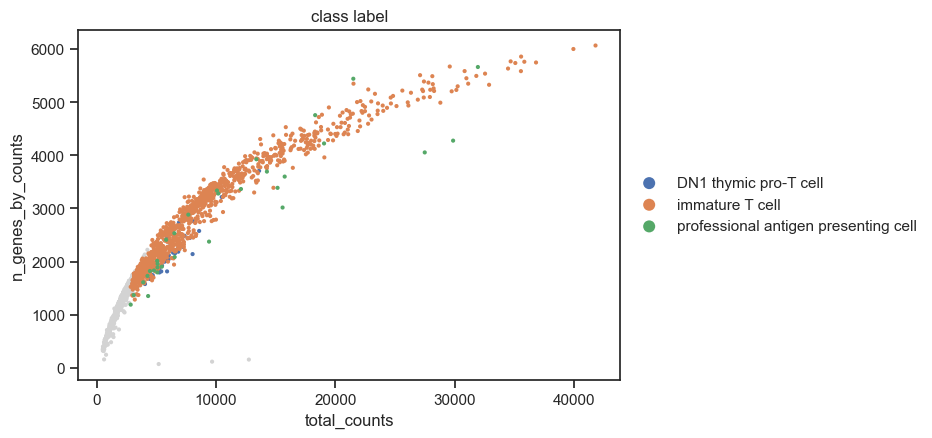

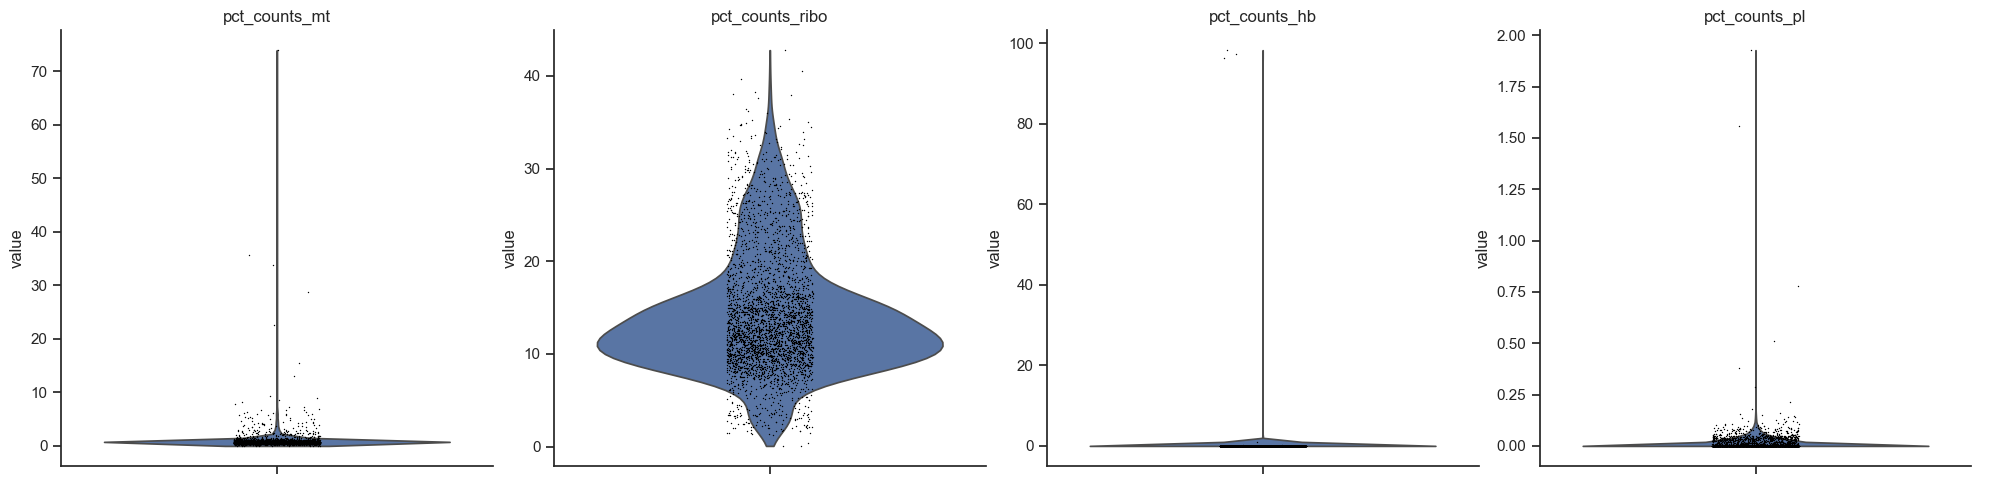

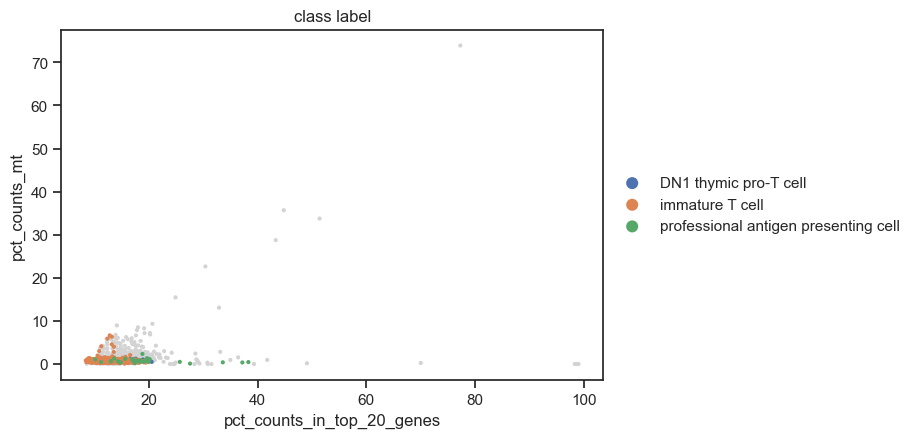

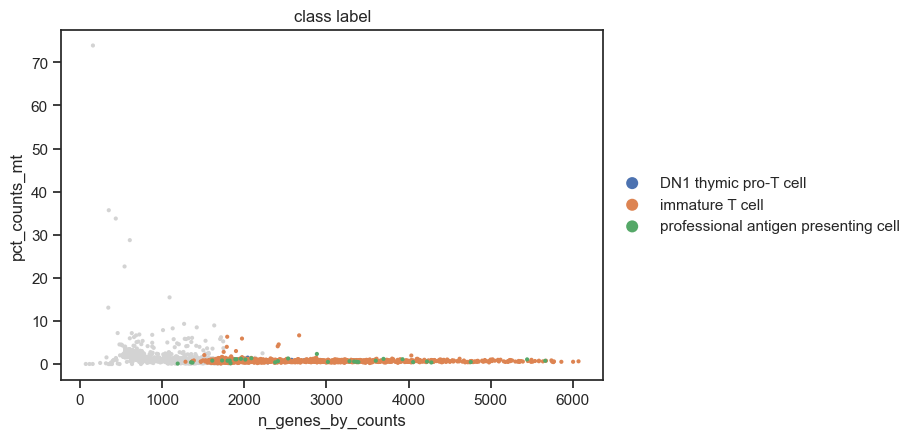

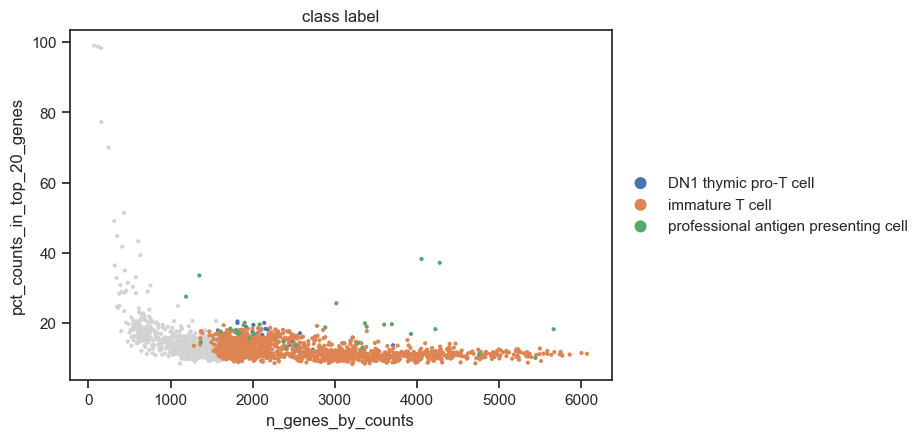

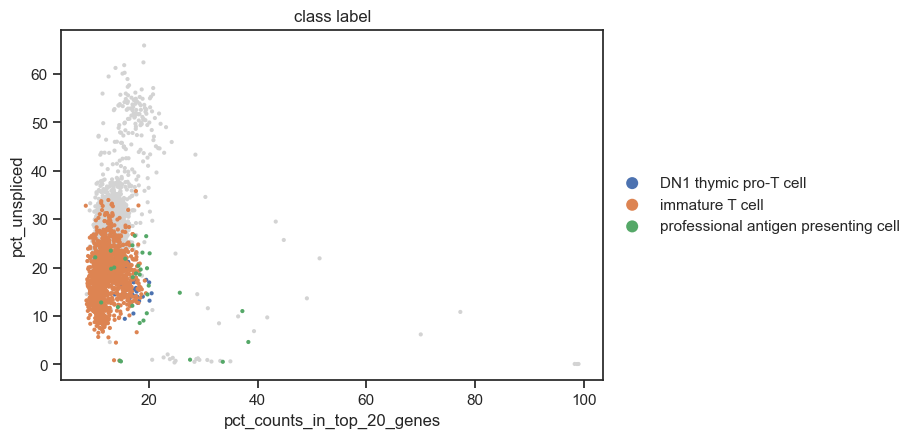

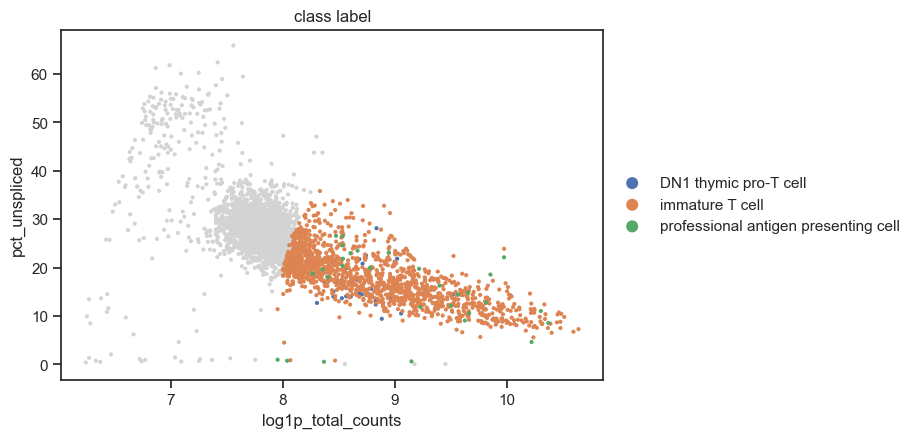

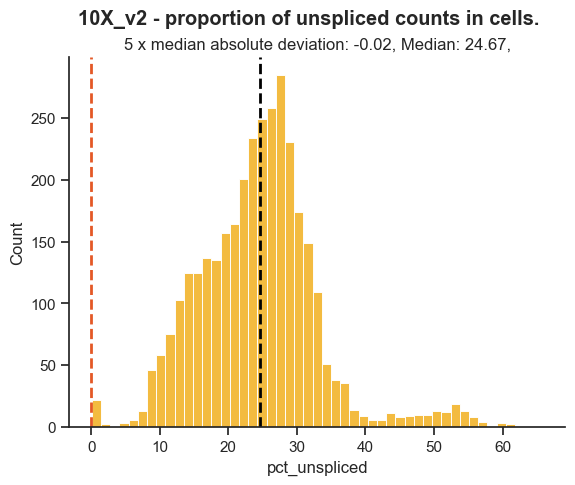

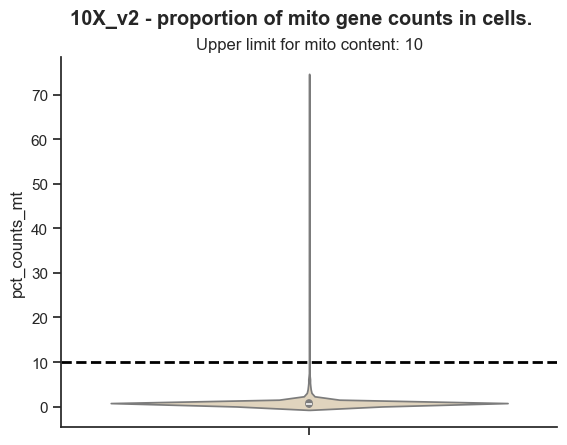

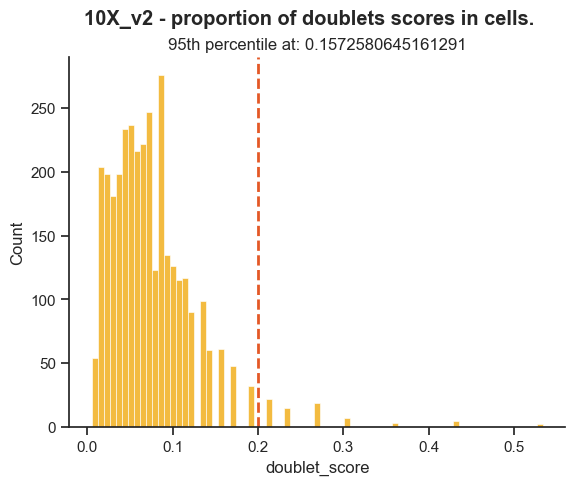

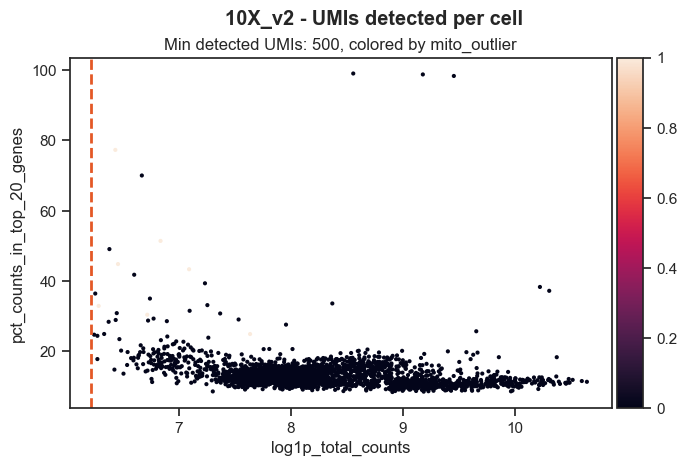

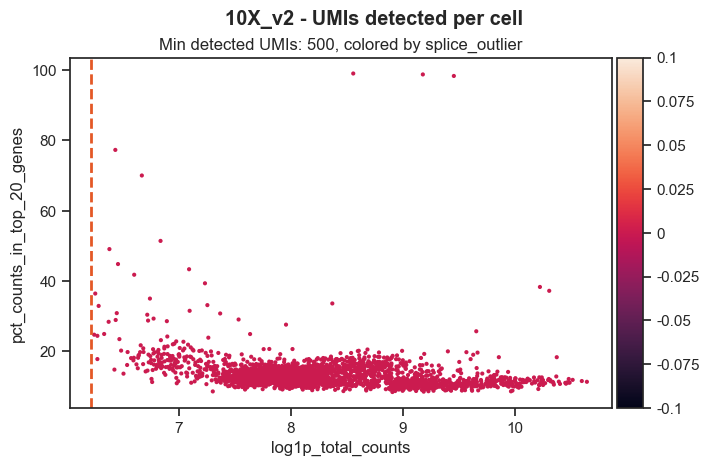

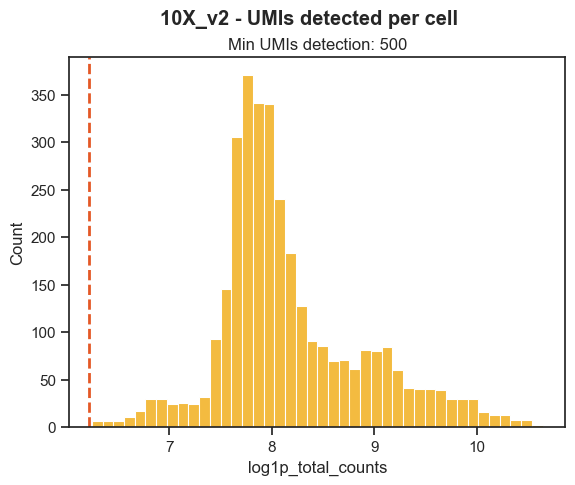

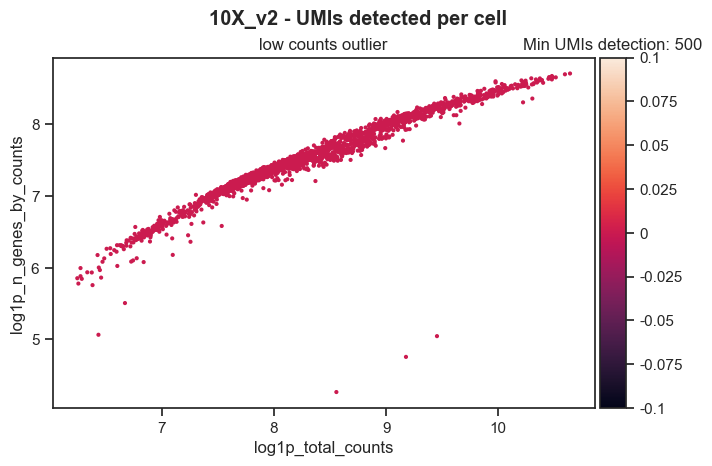

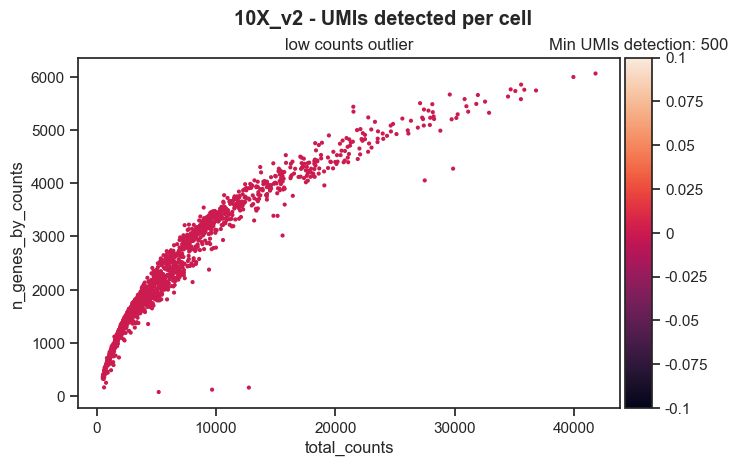

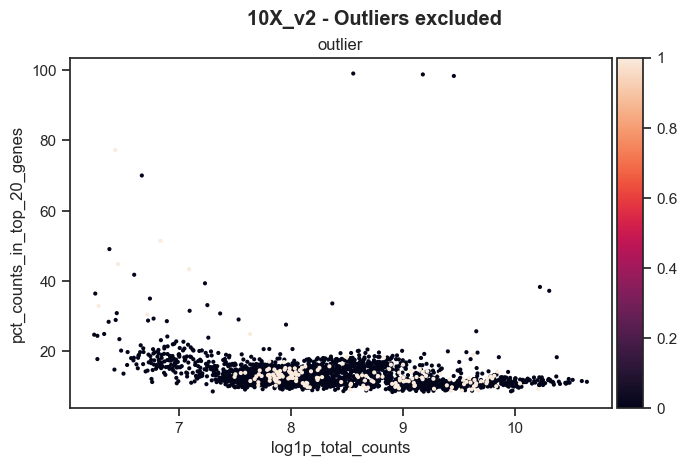

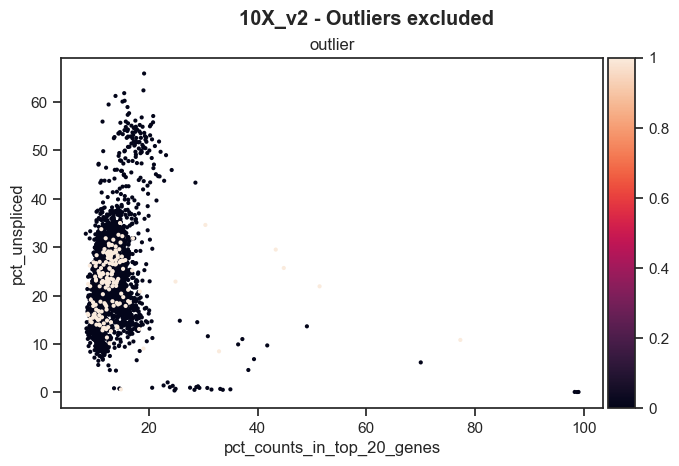

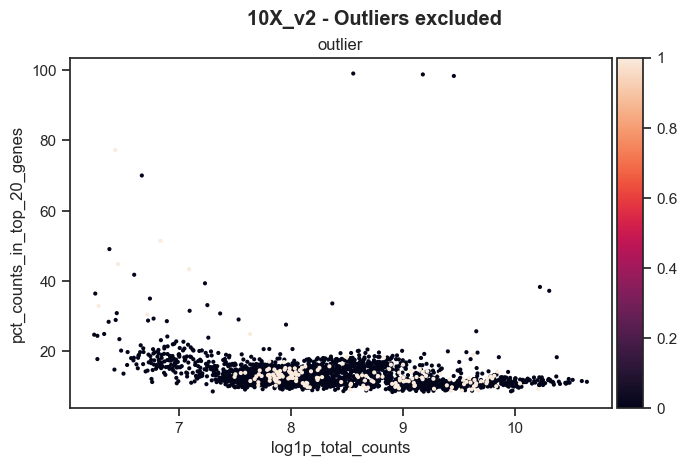

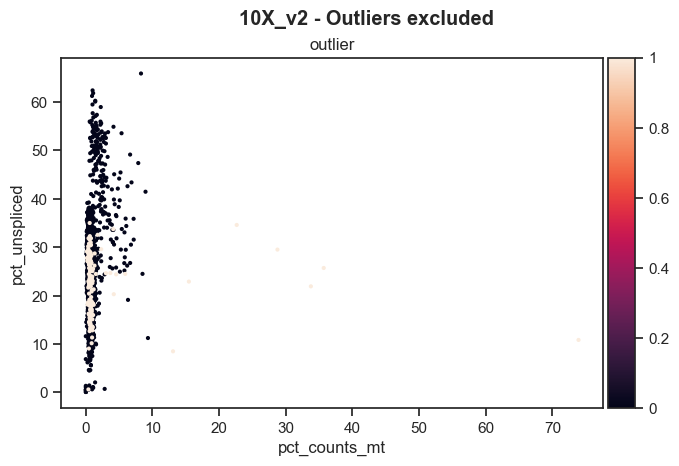

In [33]:
with save_plots_to_pdf(os.path.join(export_plots_directory, 'first_filter_plots.pdf')):
    # General overview plots
    sc.pl.scatter(adata_merged, "total_counts", "n_genes_by_counts", color="class_label")
    sc.pl.violin(adata_merged, keys=['pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'pct_counts_pl'], multi_panel = True)
    sc.pl.scatter(adata_merged, x="pct_counts_in_top_20_genes", y="pct_counts_mt", color="class_label")
    sc.pl.scatter(adata_merged, x="n_genes_by_counts", y="pct_counts_mt", color="class_label")
    sc.pl.scatter(adata_merged, x="n_genes_by_counts", y="pct_counts_in_top_20_genes",  color="class_label")

    sc.pl.scatter(adata_merged, x="pct_counts_in_top_20_genes", y="pct_unspliced", color="class_label")
    sc.pl.scatter(adata_merged, x="log1p_total_counts", y="pct_unspliced", color="class_label")
    
    if 'assigned_doublet' not in adata_merged.obs.columns:
        adata_merged.obs['assigned_doublet'] = adata_merged.obs['predicted_doublet']  
    library_method = '10X_v2'
    # library_method = adata_merged.obs['ref_library_method'].unique()[1]  
    

    if filter_unspliced:
        median  = np.median(adata_merged.obs['pct_unspliced'])
        mad = median_abs_deviation(adata_merged.obs['pct_unspliced'])

        limit_unspliced = median - mad_limit_for_unspliced * mad

        sns.histplot(adata_merged.obs['pct_unspliced'], edgecolor = None, color = '#F0A500')
        sns.despine()

        plt.axvline(x=limit_unspliced, color='#E45826', linestyle='--', linewidth=2)
        plt.axvline(x=median, color='black', linestyle='--', linewidth=2)

        plt.suptitle(f'{library_method} - proportion of unspliced counts in cells.', weight = 'bold')
        plt.title(f'{mad_limit_for_unspliced} x median absolute deviation: {round(limit_unspliced, 2)}, Median: {round(median, 2)},')

        plt.show()


        adata_merged.obs['splice_outlier'] = adata_merged.obs['pct_unspliced']<limit_unspliced

    if filter_high_mito:
        sns.violinplot(adata_merged.obs['pct_counts_mt'], color = '#E6D5B8')
        sns.despine()

        plt.axhline(y=limit_mito, linestyle='--', linewidth=2, color = 'black')
        #plt.axvline(x=median, color='black', linestyle='--', linewidth=2)

        plt.suptitle(f'{library_method} - proportion of mito gene counts in cells.', weight = 'bold')
        plt.title(f'Upper limit for mito content: {limit_mito}')

        plt.show()


        adata_merged.obs['mito_outlier'] = adata_merged.obs['pct_counts_mt']>limit_mito
       

    if filter_doublets:
        # Filtering Doublets
        doublet_score_95th_percentile = np.percentile(adata_merged.obs['doublet_score'], percentile_limit_doublets)
        sns.histplot(adata_merged.obs['doublet_score'],edgecolor = None, color = '#F0A500')
        sns.despine()

        #plt.axvline(x=doublet_score_95th_percentile, color='#E45826', linestyle='--', linewidth=2)
        plt.axvline(x=0.2, color='#E45826', linestyle='--', linewidth=2, label='Threshold (0.1)')
        plt.suptitle(f'{library_method} - proportion of doublets scores in cells.', weight = 'bold')
        plt.title(f'95th percentile at: {doublet_score_95th_percentile}')
        plt.show()

# changes: 
        adata_merged.obs['assigned_doublet'] = adata_merged.obs['doublet_score']>doublet_score_95th_percentile
       
        

    # Filtering by count
    if filter_low_counts:
        ax = sc.pl.scatter(adata_merged, x="log1p_total_counts", y="pct_counts_in_top_20_genes",  color='mito_outlier', 
                           show = False, title = f'Min detected UMIs: {min_UMIs}, colored by mito_outlier')
        ax.axvline(x=np.log1p(min_UMIs), color='#E45826', linestyle='--', linewidth=2)
        plt.suptitle(f'{library_method} - UMIs detected per cell', weight = 'bold')
        plt.show()

        ax = sc.pl.scatter(adata_merged, x="log1p_total_counts", y="pct_counts_in_top_20_genes",  color='splice_outlier', 
                           show = False, title = f'Min detected UMIs: {min_UMIs}, colored by splice_outlier')
        ax.axvline(x=np.log1p(min_UMIs), color='#E45826', linestyle='--', linewidth=2)
        plt.suptitle(f'{library_method} - UMIs detected per cell', weight = 'bold')
        plt.show()
        
        sns.histplot(adata_merged.obs['log1p_total_counts'],edgecolor = None, color = '#F0A500')
        plt.axvline(x=np.log1p(min_UMIs), color='#E45826', linestyle='--', linewidth=2)
        plt.suptitle(f'{library_method} - UMIs detected per cell', weight = 'bold')
        plt.title(f'Min UMIs detection: {min_UMIs}')
        plt.show()
        
        
        adata_merged.obs['low_counts_outlier'] = adata_merged.obs['total_counts'] < min_UMIs
        
        ax = sc.pl.scatter(adata_merged, x="log1p_total_counts", y="log1p_n_genes_by_counts",  color='low_counts_outlier', show = False)
        plt.suptitle(f'{library_method} - UMIs detected per cell', weight = 'bold')
        plt.title(f'Min UMIs detection: {min_UMIs}')
        plt.show()
        
        ax = sc.pl.scatter(adata_merged, x="total_counts", y="n_genes_by_counts",  color='low_counts_outlier', show = False)
        plt.suptitle(f'{library_method} - UMIs detected per cell', weight = 'bold')
        plt.title(f'Min UMIs detection: {min_UMIs}')
        plt.show()
        


    adata_merged.obs['outlier'] = (adata_merged.obs['splice_outlier']) |(adata_merged.obs['assigned_doublet'])| (adata_merged.obs['mito_outlier']) |(adata_merged.obs['low_counts_outlier'])


    ax = sc.pl.scatter(adata_merged, x="log1p_total_counts", y="pct_counts_in_top_20_genes",  color='outlier', 
                               show = False)
    plt.suptitle(f'{library_method} - Outliers excluded', weight = 'bold')
    plt.show()


    sc.pl.scatter(adata_merged, x="pct_counts_in_top_20_genes", y="pct_unspliced", color="outlier",
                  show = False)
    plt.suptitle(f'{library_method} - Outliers excluded', weight = 'bold')
    plt.show()

    ax = sc.pl.scatter(adata_merged, x="log1p_total_counts", y="pct_counts_in_top_20_genes",  color='outlier', 
                               show = False)
    plt.suptitle(f'{library_method} - Outliers excluded', weight = 'bold')
    plt.show()
    
    ax = sc.pl.scatter(adata_merged, x="pct_counts_mt", y="pct_unspliced",  color='outlier', 
                               show = False)
    plt.suptitle(f'{library_method} - Outliers excluded', weight = 'bold')
    plt.show()




In [34]:
print(adata_merged.obs.columns)

Index(['pct_unspliced', 'doublet_score', 'predicted_doublet',
       'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts',
       'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt',
       'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo',
       'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb',
       'log1p_total_counts_hb', 'pct_counts_hb', 'total_counts_pl',
       'log1p_total_counts_pl', 'pct_counts_pl', 'ori_barcode', 'barcode',
       'cell', 'cell_ontology_class', 'class_label', 'assigned_doublet',
       'splice_outlier', 'mito_outlier', 'low_counts_outlier', 'outlier'],
      dtype='object')


In [35]:
print(adata_merged.var.columns)

Index(['gene_symbols', 'feature_types', 'gene_ids', 'hsapiens_orthologs_id',
       'hsapiens_orthologs_name', 'mt', 'ribo', 'tf', 'hb', 'pl', 'rRNA',
       'chromosome_loc', 'pcg', 'exc', 'cyt', 'mem', 'n_cells_by_counts',
       'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts',
       'total_counts', 'log1p_total_counts'],
      dtype='object')


In [36]:
print(adata_merged.var)

                          gene_symbols    feature_types            gene_ids  \
ENSMUSG00000104478             Gm38212  Gene Expression  ENSMUSG00000104478   
ENSMUSG00000104385              Gm7449  Gene Expression  ENSMUSG00000104385   
ENSMUSG00000086053             Gm15178  Gene Expression  ENSMUSG00000086053   
ENSMUSG00000101231             Gm28283  Gene Expression  ENSMUSG00000101231   
ENSMUSG00000102135             Gm37108  Gene Expression  ENSMUSG00000102135   
...                                ...              ...                 ...   
ENSMUSG00002074970  ENSMUSG00002074970  Gene Expression  ENSMUSG00002074970   
ENSMUSG00002075729  ENSMUSG00002075729  Gene Expression  ENSMUSG00002075729   
ENSMUSG00002074899  ENSMUSG00002074899  Gene Expression  ENSMUSG00002074899   
ENSMUSG00002076890  ENSMUSG00002076890  Gene Expression  ENSMUSG00002076890   
ENSMUSG00000095742  ENSMUSG00000095742  Gene Expression  ENSMUSG00000095742   

                   hsapiens_orthologs_id hsapiens_o

In [37]:
adata_merged_save_before_filter = adata_merged.copy()

/Users/amandheer/miniconda3/lib/python3.12/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


# Second line of filtering

In [38]:
adata_merged = adata_merged_save_before_filter.copy()

In [39]:
adata_merged = adata_merged[~adata_merged.obs['outlier']].copy()

In [40]:
adata_merged.obs = adata_merged.obs.drop(columns = ['splice_outlier', 'mito_outlier', 'assigned_doublet', 'low_counts_outlier', 'outlier'])

In [41]:
filter_mito_again = True
max_perentile_limit_mito = 90 #renage between 90 and 95, , or lower if data is really dirty

total_counts_maximum_percentile = 99.5 # or 99.9
gene_counts_maximum_percentile = 99.5 # or 99.9

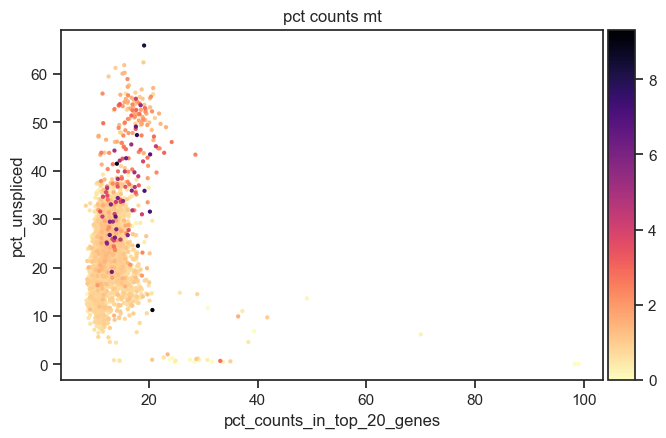

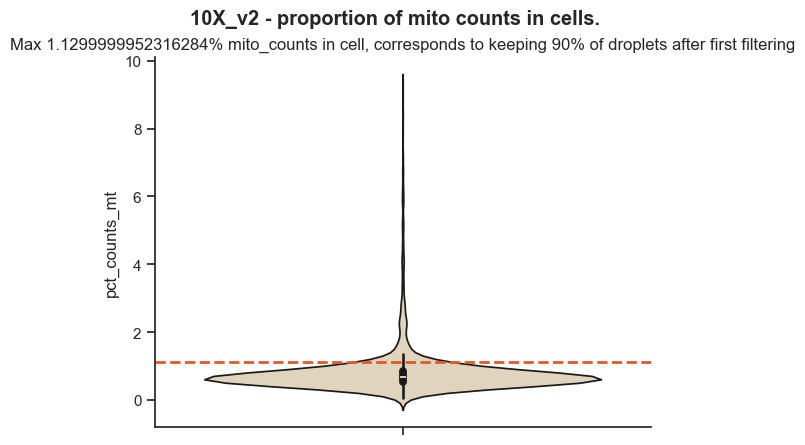

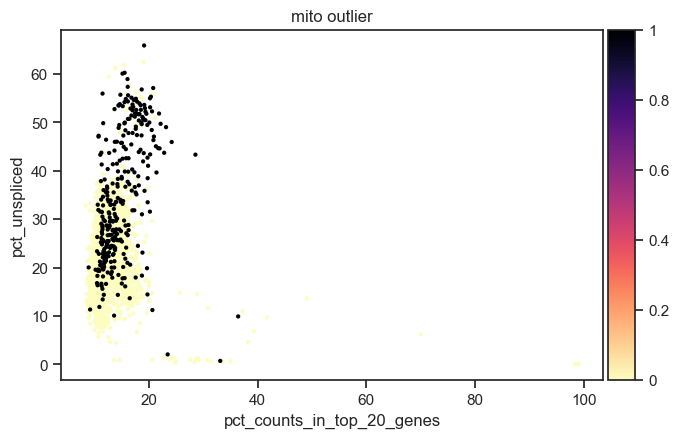

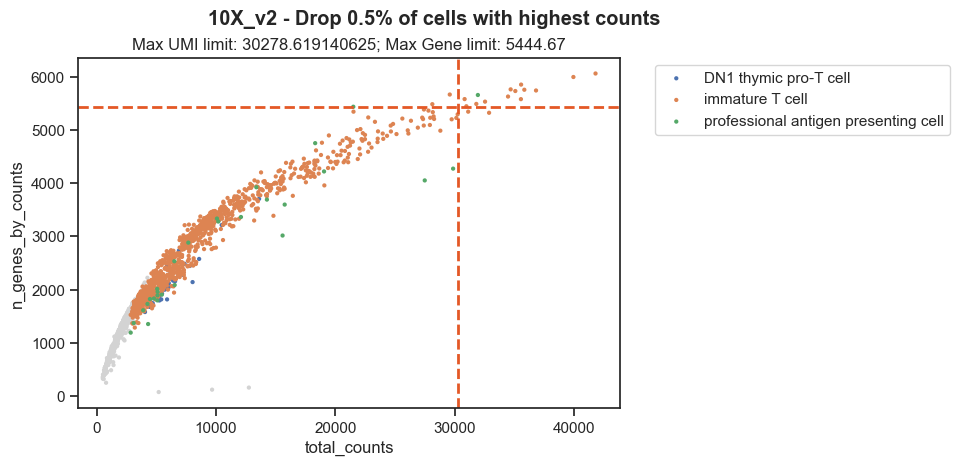

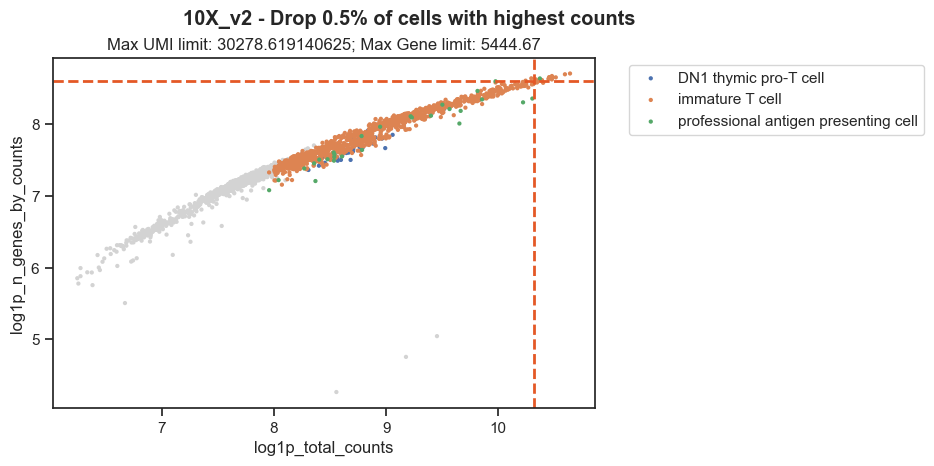

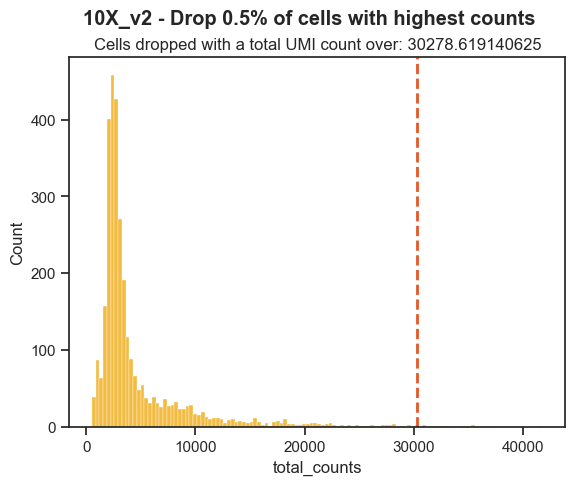

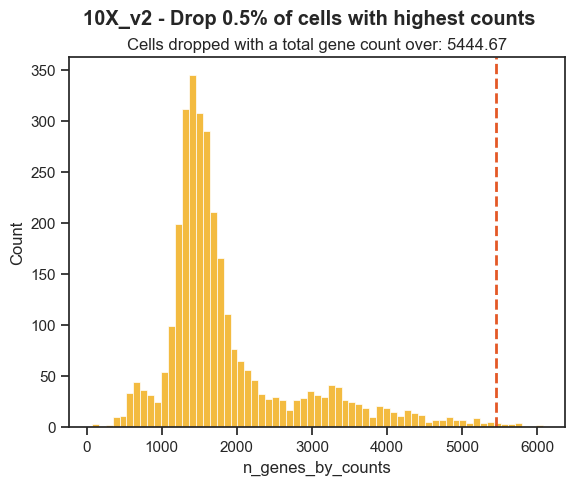

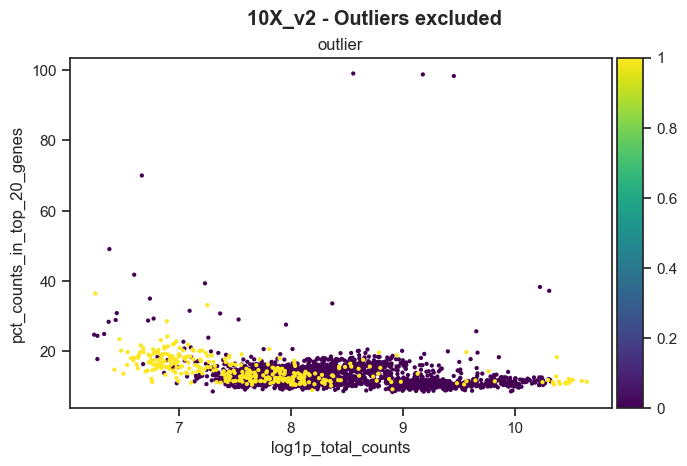

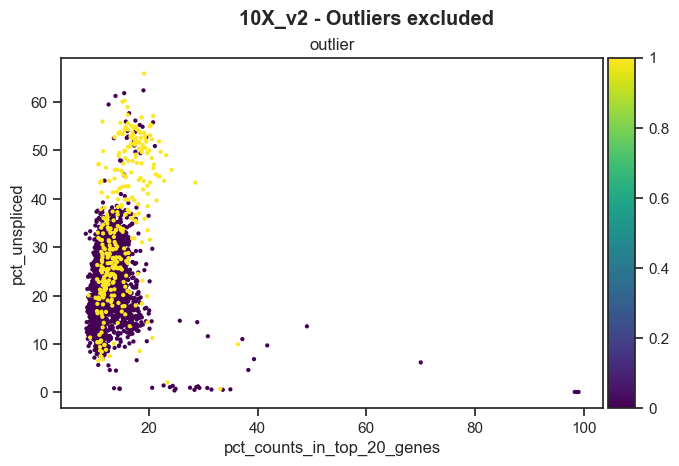

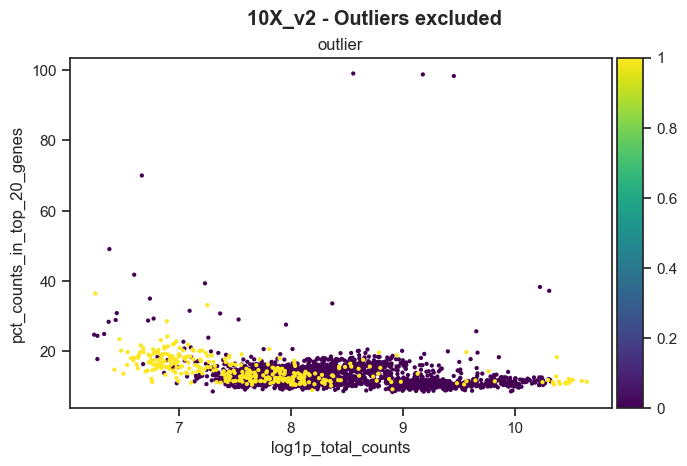

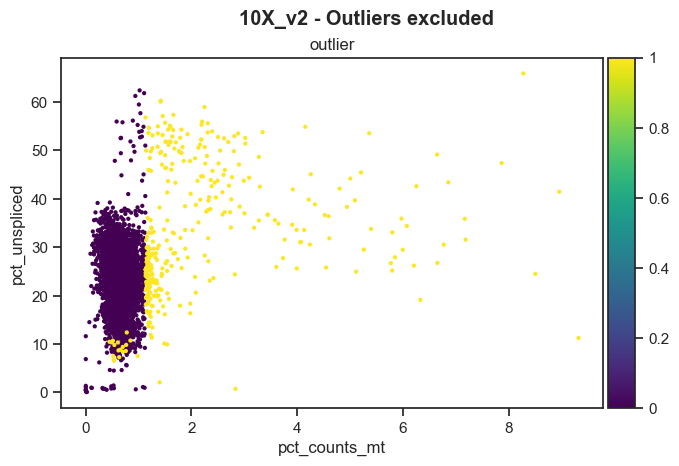

In [42]:
with save_plots_to_pdf(os.path.join(export_plots_directory, 'second_filter_plots.pdf')):
    sc.pl.scatter(adata_merged, x="pct_counts_in_top_20_genes", y="pct_unspliced",  color = 'pct_counts_mt', color_map = 'magma_r',
                                   show = False)
    plt.show()

    if filter_mito_again:

        limit_mito = np.percentile(adata_merged.obs['pct_counts_mt'], max_perentile_limit_mito)
        sns.violinplot(adata_merged.obs['pct_counts_mt'], edgecolor = '#1B1A17',  color = '#E6D5B8')
        sns.despine()
        plt.axhline(y=limit_mito, color='#E45826', linestyle='--', linewidth=2)
        plt.suptitle(f'{library_method} - proportion of mito counts in cells.', weight = 'bold')
        plt.title(f'Max {round(limit_mito,2)}% mito_counts in cell, corresponds to keeping {round(max_perentile_limit_mito)}% of droplets after first filtering')
        plt.show()



        adata_merged.obs['mito_outlier'] = adata_merged.obs['pct_counts_mt'] > limit_mito


        sc.pl.scatter(adata_merged, x="pct_counts_in_top_20_genes", y="pct_unspliced",  color = 'mito_outlier', color_map = 'magma_r')




    total_counts_99th_percentile = np.percentile(adata_merged.obs['total_counts'], total_counts_maximum_percentile)
    gene_counts_99th_percentile = np.percentile(adata_merged.obs['n_genes_by_counts'], gene_counts_maximum_percentile)


    ax = sc.pl.scatter(adata_merged, x="total_counts", y="n_genes_by_counts",  color = 'class_label',
                       title = f'Max UMI limit: {round(total_counts_99th_percentile,2)}; Max Gene limit: {round(gene_counts_99th_percentile,2)}',
                                   show = False)
    plt.suptitle(f'{library_method} - Drop {round(100-total_counts_maximum_percentile,3)}% of cells with highest counts', weight = 'bold')
    plt.axvline(x=total_counts_99th_percentile, color='#E45826',linestyle='--', linewidth=2)
    plt.axhline(y=gene_counts_99th_percentile, color='#E45826',linestyle='--', linewidth=2)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

    ax = sc.pl.scatter(adata_merged, x="log1p_total_counts", y="log1p_n_genes_by_counts",   color = 'class_label',
                                          title = f'Max UMI limit: {round(total_counts_99th_percentile,2)}; Max Gene limit: {round(gene_counts_99th_percentile,2)}',
                                   show = False)
    plt.suptitle(f'{library_method} - Drop {round(100-total_counts_maximum_percentile,3)}% of cells with highest counts', weight = 'bold')
    plt.axvline(x=np.log1p(total_counts_99th_percentile), color='#E45826', linestyle='--', linewidth=2)
    plt.axhline(y=np.log1p(gene_counts_99th_percentile), color='#E45826', linestyle='--', linewidth=2)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


    sns.histplot(adata_merged.obs['total_counts'], edgecolor = None, color = '#F0A500')
    plt.axvline(x=total_counts_99th_percentile, color='#E45826', linestyle='--', linewidth=2)
    plt.suptitle(f'{library_method} - Drop {round(100-total_counts_maximum_percentile,3)}% of cells with highest counts', weight = 'bold')
    plt.title(f'Cells dropped with a total UMI count over: {round(total_counts_99th_percentile, 2)}')
    plt.show()



    sns.histplot(adata_merged.obs['n_genes_by_counts'], edgecolor = None, color = '#F0A500')
    plt.axvline(x=gene_counts_99th_percentile,color='#E45826', linestyle='--', linewidth=2)
    plt.suptitle(f'{library_method} - Drop {round(100-gene_counts_maximum_percentile,3)}% of cells with highest counts', weight = 'bold')
    plt.title(f'Cells dropped with a total gene count over: {round(gene_counts_99th_percentile, 2)}')
    plt.show()
    
    adata_merged.obs['high_count_outlier'] = (adata_merged.obs['total_counts'] > total_counts_99th_percentile) | (adata_merged.obs['n_genes_by_counts'] > gene_counts_99th_percentile)
    
    
    
    

    adata_merged.obs['outlier'] = (adata_merged.obs['mito_outlier']) |(adata_merged.obs['high_count_outlier'])


    ax = sc.pl.scatter(adata_merged, x="log1p_total_counts", y="pct_counts_in_top_20_genes",  color='outlier', color_map = 'viridis',
                               show = False)
    plt.suptitle(f'{library_method} - Outliers excluded', weight = 'bold')
    plt.show()


    sc.pl.scatter(adata_merged, x="pct_counts_in_top_20_genes", y="pct_unspliced", color="outlier",color_map = 'viridis',
                  show = False)
    plt.suptitle(f'{library_method} - Outliers excluded', weight = 'bold')
    plt.show()

    ax = sc.pl.scatter(adata_merged, x="log1p_total_counts", y="pct_counts_in_top_20_genes",  color='outlier', color_map = 'viridis',
                               show = False)
    plt.suptitle(f'{library_method} - Outliers excluded', weight = 'bold')
    plt.show()
    
    ax = sc.pl.scatter(adata_merged, x="pct_counts_mt", y="pct_unspliced",  color='outlier', color_map = 'viridis',
                               show = False)
    plt.suptitle(f'{library_method} - Outliers excluded', weight = 'bold')
    plt.show()



In [43]:
adata_merged = adata_merged[~adata_merged.obs['outlier']].copy()

In [44]:
adata_merged.obs = adata_merged.obs.drop(columns = ['outlier', 'high_count_outlier', 'mito_outlier'])



In [45]:
print(adata_merged)

AnnData object with n_obs × n_vars = 2849 × 57010
    obs: 'pct_unspliced', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'total_counts_pl', 'log1p_total_counts_pl', 'pct_counts_pl', 'ori_barcode', 'barcode', 'cell', 'cell_ontology_class', 'class_label'
    var: 'gene_symbols', 'feature_types', 'gene_ids', 'hsapiens_orthologs_id', 'hsapiens_orthologs_name', 'mt', 'ribo', 'tf', 'hb', 'pl', 'rRNA', 'chromosome_loc', 'pcg', 'exc', 'cyt', 'mem', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'scrublet', 'class_label_colors'


In [46]:
# Calculate QC metrics
# sc.pp.calculate_qc_metrics(adata_merged, qc_vars=["mt", "ribo", "hb", "pl", "exc", "cyt", "mem"],
              #         inplace=True, percent_top=[20], log1p=False)

In [47]:
# QC COLUMNS
qc_columns = ['total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'pct_counts_pl']
print("Summary of QC metrics:")
print(adata_merged.obs[qc_columns].describe())


Summary of QC metrics:
       total_counts  n_genes_by_counts  pct_counts_mt  pct_counts_ribo  \
count   2849.000000        2849.000000    2849.000000      2849.000000   
mean    4805.076660        1931.736048       0.645619        14.460740   
std     4532.097656         900.799794       0.208317         6.150416   
min      514.000000          70.000000       0.000000         0.070599   
25%     2353.000000        1379.000000       0.501475        10.191366   
50%     2962.000000        1594.000000       0.638441        12.855114   
75%     5092.000000        2102.000000       0.784929        16.770340   
max    30235.000000        5444.000000       1.128844        42.768234   

       pct_counts_hb  pct_counts_pl  
count    2849.000000    2849.000000  
mean        0.102615       0.010655  
std         3.156577       0.037780  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.008984  
max   

In [49]:
import os

# Check and remove the problematic Scrublet object from .uns
if 'scrublet' in adata_merged.uns:
    print("Removing 'scrublet' object from .uns to allow saving.")
    del adata_merged.uns['scrublet']

# Save the AnnData object
output_h5ad_path = os.path.join(sample_h5ad_export_dir, f"{library_method}_all_genes.h5ad")
adata_merged.write_h5ad(output_h5ad_path)
print(f"Filtered data saved to: {output_h5ad_path}")

library_method = adata_merged.uns.get("library_method", "default_library_method")

# Export directory and file path
pp_name = 'pp_out_merged_velocyto'
sample_h5ad_export_dir = os.path.join(h5ad_export_dir, pp_name)

# Ensure the directory exists
os.makedirs(sample_h5ad_export_dir, exist_ok=True)

# Define the output file path
output_h5ad_path = os.path.join(sample_h5ad_export_dir, f"{library_method}_all_genes.h5ad")

# Save the AnnData object
adata_merged.write_h5ad(output_h5ad_path)
print(f"Filtered data saved to: {output_h5ad_path}")

Removing 'scrublet' object from .uns to allow saving.
Filtered data saved to: /Users/amandheer/Desktop/alignment_data/thymus/pp_out_merged_velocyto/default_library_method_all_genes.h5ad
Filtered data saved to: /Users/amandheer/Desktop/alignment_data/thymus/pp_out_merged_velocyto/default_library_method_all_genes.h5ad


# Clustering

In [50]:
os.path.join(sample_h5ad_export_dir, f"{library_method}_all_genes.h5ad")

'/Users/amandheer/Desktop/alignment_data/thymus/pp_out_merged_velocyto/default_library_method_all_genes.h5ad'

In [51]:
print(sample_h5ad_export_dir)


/Users/amandheer/Desktop/alignment_data/thymus/pp_out_merged_velocyto


In [52]:
adata_merged = read_h5ad(os.path.join(sample_h5ad_export_dir, f"{library_method}_all_genes.h5ad"))

In [53]:
print(f"Minimum pct_unspliced: {min(adata_merged.obs['pct_unspliced'])}")

print(f"Maximum pct_counts_mt: {max(adata_merged.obs['pct_counts_mt'])}")

print(f"Maximum total_counts: {max(adata_merged.obs['total_counts'])}")
print(f"Minimum total_counts: {min(adata_merged.obs['total_counts'])}")

print(f"Maximum n_genes_by_counts: {max(adata_merged.obs['n_genes_by_counts'])}")
print(f"Minimum n_genes_by_counts: {min(adata_merged.obs['n_genes_by_counts'])}")




Minimum pct_unspliced: 0.0827386492915503
Maximum pct_counts_mt: 1.128843903541565
Maximum total_counts: 30235.0
Minimum total_counts: 514.0
Maximum n_genes_by_counts: 5444
Minimum n_genes_by_counts: 70


In [54]:
sc.pp.filter_genes(adata_merged, min_cells = 3)
#genes_to_exclude = ['ENSMFAG00000062016', 'ENSMFAG00000062016','ENSMFAG00000064104' ]
#genes_excluded = adata.var[adata.var.index.isin(genes_to_exclude)]


#adata = adata[:,~adata.var.index.isin(genes_to_exclude)].copy()

In [55]:
adata_merged


AnnData object with n_obs × n_vars = 2849 × 17056
    obs: 'pct_unspliced', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'total_counts_pl', 'log1p_total_counts_pl', 'pct_counts_pl', 'ori_barcode', 'barcode', 'cell', 'cell_ontology_class', 'class_label'
    var: 'gene_symbols', 'feature_types', 'gene_ids', 'hsapiens_orthologs_id', 'hsapiens_orthologs_name', 'mt', 'ribo', 'tf', 'hb', 'pl', 'rRNA', 'chromosome_loc', 'pcg', 'exc', 'cyt', 'mem', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'class_label_colors'

In [56]:
adata_merged.layers['soupx_counts'] = adata_merged.X.copy()

In [57]:
print(adata_merged.obs.columns)

Index(['pct_unspliced', 'doublet_score', 'predicted_doublet',
       'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts',
       'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt',
       'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo',
       'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb',
       'log1p_total_counts_hb', 'pct_counts_hb', 'total_counts_pl',
       'log1p_total_counts_pl', 'pct_counts_pl', 'ori_barcode', 'barcode',
       'cell', 'cell_ontology_class', 'class_label'],
      dtype='object')


In [58]:
print(adata_merged.var.columns)

Index(['gene_symbols', 'feature_types', 'gene_ids', 'hsapiens_orthologs_id',
       'hsapiens_orthologs_name', 'mt', 'ribo', 'tf', 'hb', 'pl', 'rRNA',
       'chromosome_loc', 'pcg', 'exc', 'cyt', 'mem', 'n_cells_by_counts',
       'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts',
       'total_counts', 'log1p_total_counts', 'n_cells'],
      dtype='object')


/Users/amandheer/miniconda3/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:314: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca
/Users/amandheer/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


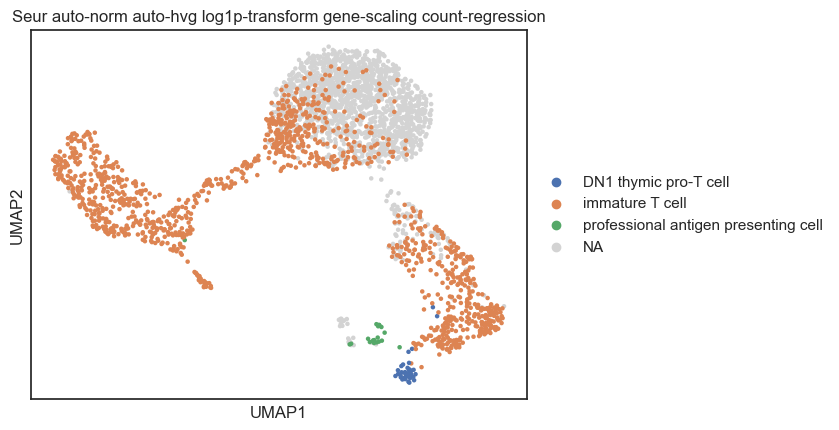

In [59]:
sc.pp.normalize_total(adata_merged)
sc.pp.log1p(adata_merged)
sc.pp.highly_variable_genes(adata_merged)
adata_merged = adata_merged[:, adata_merged.var.highly_variable]
#sc.pp.scale(adata, max_value=10) # optional
#sc.pp.regress_out(adata, ['total_counts']) # optional , regress total_counts, regress pct_mt_counts
sc.pp.pca(adata_merged)
sc.pp.neighbors(adata_merged, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata_merged, method = 'umap')
sc.pl.umap(adata_merged, color = 'class_label',title = 'Seur auto-norm auto-hvg log1p-transform gene-scaling count-regression' )



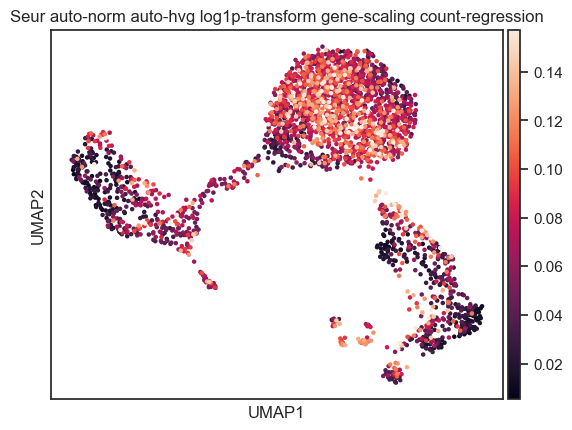

In [60]:
sc.pl.umap(adata_merged, color = 'doublet_score',title = 'Seur auto-norm auto-hvg log1p-transform gene-scaling count-regression' )

In [61]:
sc.pp.normalize_total(adata_merged)

# If the matrix is sparse, convert it to dense first
if isinstance(adata_merged.X, np.ndarray):
    # If it's already dense, just use it directly
    X_dense = adata_merged.X
else:
    # Convert sparse matrix to dense
    X_dense = adata_merged.X.todense()

# Now compute variance, mean, median and std (axis=0 for genes)
adata_merged.var['norm_variance'] = np.var(X_dense, axis=0).T
adata_merged.var['norm_mean'] = np.mean(X_dense, axis=0).T
adata_merged.var['norm_median'] = np.median(X_dense, axis=0).T
adata_merged.var['norm_std'] = np.sqrt(adata_merged.var['norm_variance']).T

sc.pp.log1p(adata_merged)

if isinstance(adata_merged.X, np.ndarray):
    X_dense_log1p = adata_merged.X
else:
    X_dense_log1p = adata_merged.X.todense()

# Now compute variance (axis=0 for genes) after log1p transformation
adata_merged.var['log1p_norm_variance'] = np.var(X_dense_log1p, axis=0).T

# Compute mean, median, and standard deviation using the log1p transformed data
adata_merged.var['log1p_norm_mean'] = np.mean(X_dense_log1p, axis=0).T
adata_merged.var['log1p_norm_median'] = np.median(X_dense_log1p, axis=0).T
adata_merged.var['log1p_norm_std'] = np.sqrt(adata_merged.var['log1p_norm_variance']).T

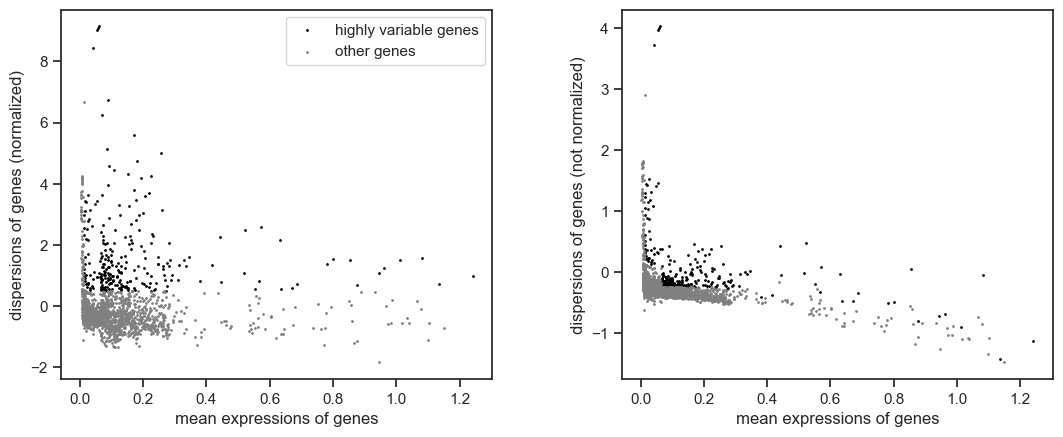

In [62]:
sc.pp.highly_variable_genes(adata_merged)

sc.pl.highly_variable_genes(adata_merged)

In [63]:
adata_merged.layers['sqrt_transformed'] = np.sqrt(adata_merged.X)

In [64]:
sc.pp.scale(adata_merged, max_value=10)
adata_merged.layers['scaled_1'] = adata_merged.X.copy()



In [65]:
sc.pp.pca(adata_merged,layer = 'sqrt_transformed' )
sc.pp.neighbors(adata_merged)
sc.tl.umap(adata_merged)

In [66]:
adata_merged.X = np.where(adata_merged.X < 0, 1e-6, adata_merged.X)

adata_merged.layers['sqrt_transformed'] = np.sqrt(adata_merged.X)

original_X = adata_merged.X.copy()
adata_merged.X = adata_merged.layers['sqrt_transformed']

sc.pp.pca(adata_merged)
sc.pp.neighbors(adata_merged)
sc.tl.umap(adata_merged)

adata_merged.X = original_X


In [67]:
!pip install igraph
!pip install leidenalg
sc.tl.leiden(adata_merged)

/var/folders/8p/xlqh16zs5s12cjly36xp9prr0000gn/T/ipykernel_27337/1202214018.py:3: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata_merged)


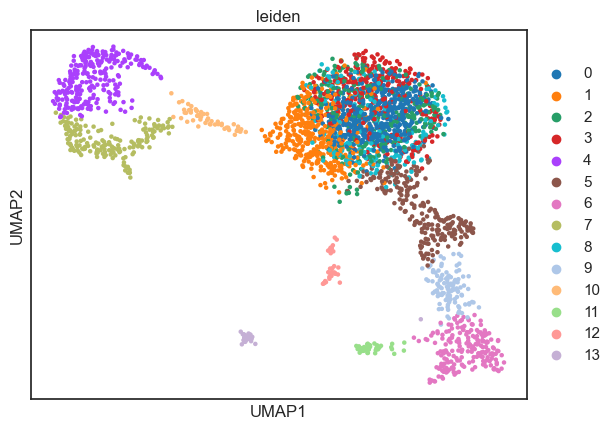

In [68]:
sc.pl.umap(adata_merged, color = 'leiden')


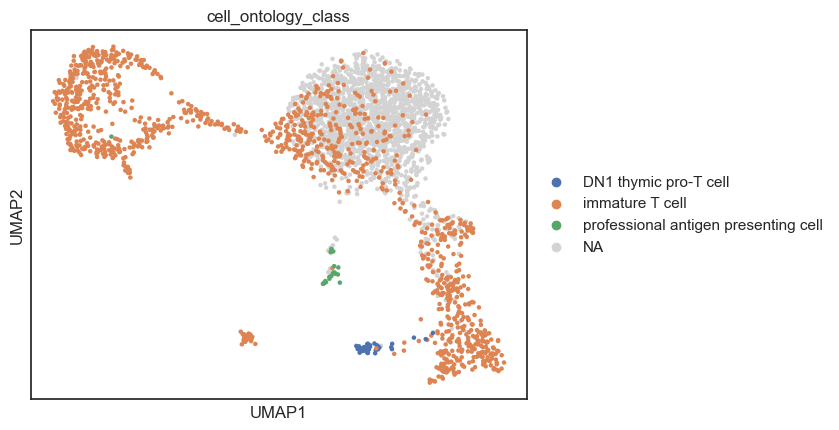

In [73]:
sc.pl.umap(adata_merged, color = 'cell_ontology_class')
## THis is normal scaled

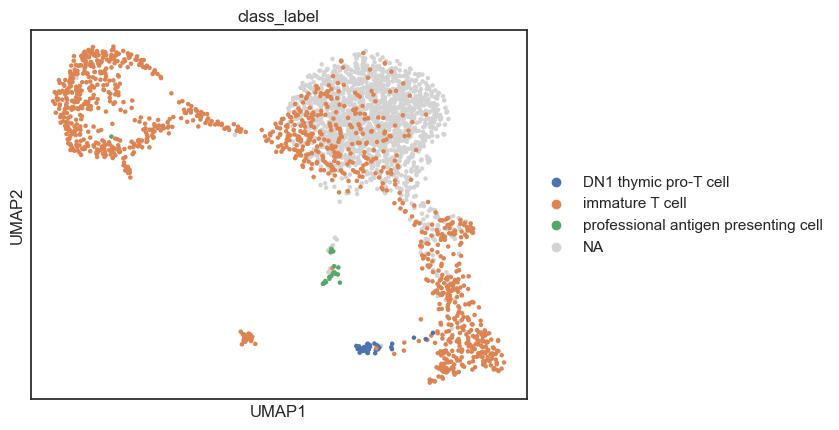

In [71]:
sc.pl.umap(adata_merged, color = 'class_label')
## THis is pearson residuals normalisation

In [72]:
adata_merged

AnnData object with n_obs × n_vars = 2849 × 2099
    obs: 'pct_unspliced', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'total_counts_pl', 'log1p_total_counts_pl', 'pct_counts_pl', 'ori_barcode', 'barcode', 'cell', 'cell_ontology_class', 'class_label', 'leiden'
    var: 'gene_symbols', 'feature_types', 'gene_ids', 'hsapiens_orthologs_id', 'hsapiens_orthologs_name', 'mt', 'ribo', 'tf', 'hb', 'pl', 'rRNA', 'chromosome_loc', 'pcg', 'exc', 'cyt', 'mem', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'norm_variance', 'norm_mean', 'norm_median', 'norm_std

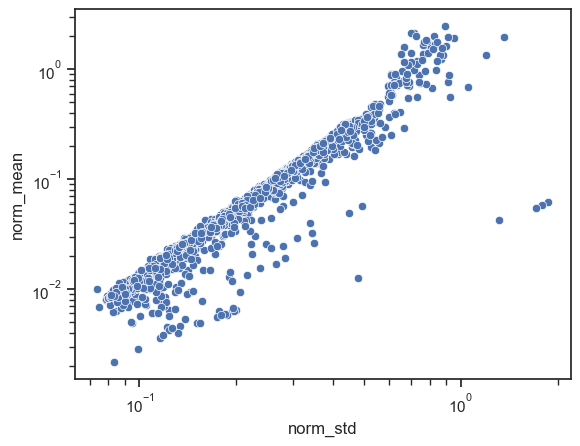

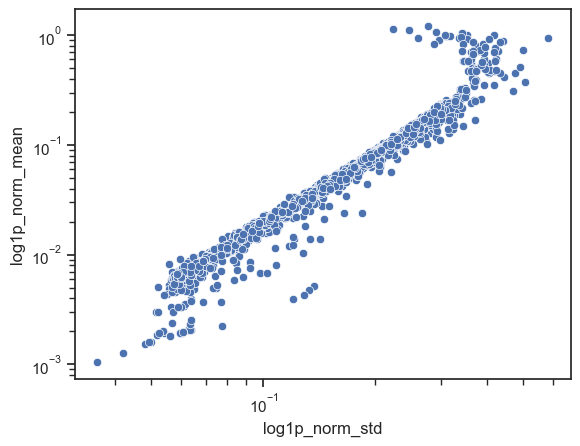

In [74]:
sns.scatterplot(adata_merged.var, x = 'norm_std', y = 'norm_mean')
plt.xscale('log')
plt.yscale('log')
plt.show()
sns.scatterplot(adata_merged.var, x = 'log1p_norm_std', y = 'log1p_norm_mean')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [81]:
adata_merged

AnnData object with n_obs × n_vars = 2849 × 2099
    obs: 'pct_unspliced', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'total_counts_pl', 'log1p_total_counts_pl', 'pct_counts_pl', 'ori_barcode', 'barcode', 'cell', 'cell_ontology_class', 'class_label', 'leiden'
    var: 'gene_symbols', 'feature_types', 'gene_ids', 'hsapiens_orthologs_id', 'hsapiens_orthologs_name', 'mt', 'ribo', 'tf', 'hb', 'pl', 'rRNA', 'chromosome_loc', 'pcg', 'exc', 'cyt', 'mem', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'norm_variance', 'norm_mean', 'norm_median', 'norm_std

In [82]:
# genes_to_remove = ['ENSMFAG00000062016', 'ENSMFAG00000062016','ENSMFAG00000064104' ]

In [83]:
print(adata_merged.var.columns)

Index(['gene_symbols', 'feature_types', 'gene_ids', 'hsapiens_orthologs_id',
       'hsapiens_orthologs_name', 'mt', 'ribo', 'tf', 'hb', 'pl', 'rRNA',
       'chromosome_loc', 'pcg', 'exc', 'cyt', 'mem', 'n_cells_by_counts',
       'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts',
       'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable',
       'means', 'dispersions', 'dispersions_norm', 'norm_variance',
       'norm_mean', 'norm_median', 'norm_std', 'log1p_norm_variance',
       'log1p_norm_mean', 'log1p_norm_median', 'log1p_norm_std', 'mean',
       'std'],
      dtype='object')


In [84]:
adata_merged.sort_values('norm_std', ascending = False )[0:20][['gene_symbols', 'gene_ids', 'hsapiens_orthologs_id', 'hsapiens_orthologs_name', 'mt', 'ribo', 'tf', 'hb', 'pl', 'rRNA', 'chromosome_loc', 'pcg', 'exc', 'cyt', 'mem', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts']]



AttributeError: 'AnnData' object has no attribute 'sort_values'

KeyError: 'Could not find key ENSMFAG00000052452 in .var_names or .obs.columns.'

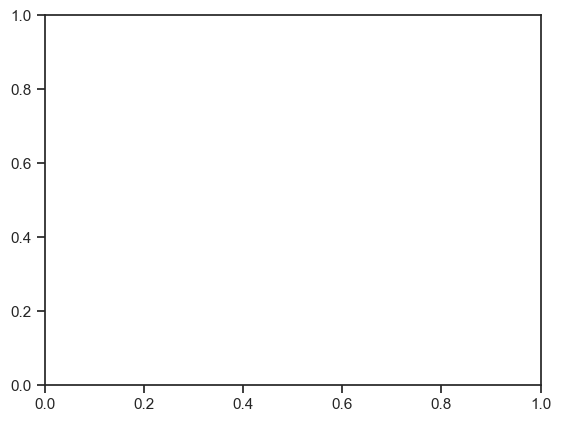

In [85]:
sc.pl.umap(adata_merged, color = 'ENSMFAG00000052452')

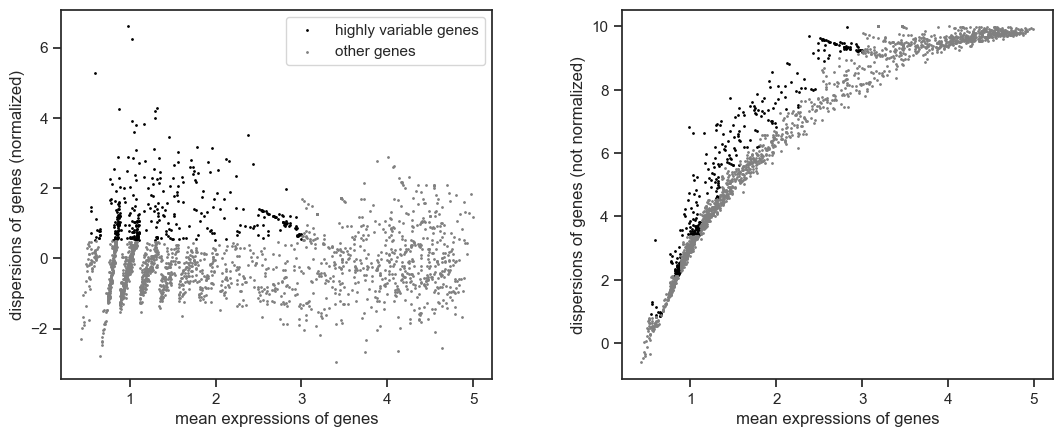

In [86]:
sc.pp.highly_variable_genes(adata_merged)

sc.pl.highly_variable_genes(adata_merged)

In [87]:
adata_merged.var[adata_merged.var['highly_variable']].sort_values('norm_variance', ascending = False )[0:20][['gene_symbols', 'gene_ids', 'hsapiens_orthologs_id', 'hsapiens_orthologs_name', 'mt', 'ribo', 'tf', 'hb', 'pl', 'rRNA', 'chromosome_loc', 'pcg', 'exc', 'cyt', 'mem', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts']]



gene_symbols            gene_ids hsapiens_orthologs_id  \
ENSMUSG00000079523       Tmsb10  ENSMUSG00000079523                   nan   
ENSMUSG00000026238         Ptma  ENSMUSG00000026238                   nan   
ENSMUSG00000029580         Actb  ENSMUSG00000029580       ENSG00000075624   
ENSMUSG00000060802          B2m  ENSMUSG00000060802       ENSG00000166710   
ENSMUSG00000006360        Crip1  ENSMUSG00000006360       ENSG00000213145   
ENSMUSG00000050708         Ftl1  ENSMUSG00000050708       ENSG00000087086   
ENSMUSG00000022014       Epsti1  ENSMUSG00000022014       ENSG00000133106   
ENSMUSG00000027985         Lef1  ENSMUSG00000027985       ENSG00000138795   
ENSMUSG00000007892        Rplp1  ENSMUSG00000007892       ENSG00000137818   
ENSMUSG00000019505          Ubb  ENSMUSG00000019505       ENSG00000170315   
ENSMUSG00000024661         Fth1  ENSMUSG00000024661       ENSG00000167996   
ENSMUSG00000018168        Ikzf3  ENSMUSG00000018168       ENSG00000161405   
ENSMUSG00000032724        Abtb2  ENSMUSG00000032724       ENSG00000166016   
ENSMUSG00000078247         Airn  ENSMUSG00000078247                   nan   
ENSMUSG00000026012         Cd28  ENSMUSG00000026012       ENSG00000178562   
ENSMUSG00000015501       Hivep2  ENSMUSG00000015501       ENSG00000010818   
ENSMUSG00000020015        Cdk17  ENSMUSG00000020015       ENSG00000059758   
ENSMUSG00000027447         Cst3  ENSMUSG00000027447       ENSG00000101439   
ENSMUSG00000037940       Inpp4b  ENSMUSG00000037940       ENSG00000109452   
ENSMUSG00000064373      Selenop  ENSMUSG00000064373       ENSG00000250722   

                   hsapiens_orthologs_name     mt   ribo     tf     hb     pl  \
ENSMUSG00000079523                     nan  False  False  False  False  False   
ENSMUSG00000026238                     nan  False  False  False  False  False   
ENSMUSG00000029580                    ACTB  False  False  False  False  False   
ENSMUSG00000060802                     B2M  False  False  False  False  False   
ENSMUSG00000006360                   CRIP1  False  False  False  False  False   
ENSMUSG00000050708                     FTL  False  False  False  False  False   
ENSMUSG00000022014                  EPSTI1  False  False  False  False  False   
ENSMUSG00000027985                    LEF1  False  False   True  False  False   
ENSMUSG00000007892                   RPLP1  False   True  False  False  False   
ENSMUSG00000019505                     UBB  False  False  False  False  False   
ENSMUSG00000024661                    FTH1  False  False  False  False  False   
ENSMUSG00000018168                   IKZF3  False  False  False  False  False   
ENSMUSG00000032724                   ABTB2  False  False  False  False  False   
ENSMUSG00000078247                     nan  False  False  False  False  False   
ENSMUSG00000026012                    CD28  False  False  False  False  False   
ENSMUSG00000015501                  HIVEP2  False  False  False  False  False   
ENSMUSG00000020015                   CDK17  False  False  False  False  False   
ENSMUSG00000027447                    CST3  False  False  False  False  False   
ENSMUSG00000037940                  INPP4B  False  False  False  False  False   
ENSMUSG00000064373                 SELENOP  False  False  False  False  False   

                     rRNA chromosome_loc    pcg    exc    cyt    mem  \
ENSMUSG00000079523  False              6  False  False  False  False   
ENSMUSG00000026238  False              1  False  False   True  False   
ENSMUSG00000029580  False              5  False  False   True   True   
ENSMUSG00000060802  False              2  False  False   True  False   
ENSMUSG00000006360  False             12  False  False  False  False   
ENSMUSG00000050708  False              7  False  False  False  False   
ENSMUSG00000022014  False             14  False  False  False  False   
ENSMUSG00000027985  False              3  False  False  False  False   
ENSMUSG00000007892  False              9  False  Fa

In [88]:
sc.pp.pca(adata_merged)
sc.pp.neighbors(adata_merged)
sc.tl.umap(adata_merged)

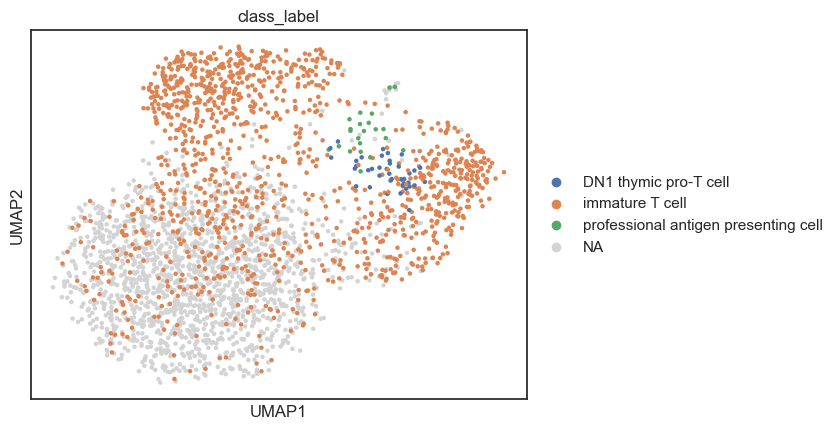

In [89]:
sc.pl.umap(adata_merged, color = 'class_label')

In [90]:
adata_merged.obs

pct_unspliced  doublet_score  predicted_doublet  n_genes_by_counts  \
0         23.511635       0.044776              False               1657   
1         11.749446       0.074197              False               5089   
2         25.000000       0.088384              False               1342   
3         16.141384       0.042748              False               1737   
4         28.976641       0.028606              False               1223   
...             ...            ...                ...                ...   
3341      27.234490       0.133333              False               1525   
3342      29.256323       0.014559              False               1548   
3343      30.494406       0.094040              False               1567   
3344      19.342554       0.018381              False               1869   
3345      30.850595       0.056985              False               1390   

      log1p_n_genes_by_counts  total_counts  log1p_total_counts  \
0                    7.413367        3453.0            8.147288   
1                    8.535033       24627.0           10.111639   
2                    7.202661        2180.0            7.687539   
3                    7.460490        3550.0            8.174985   
4                    7.109879        1895.0            7.547502   
...                       ...           ...                 ...   
3341                 7.330405        2950.0            7.989899   
3342                 7.345365        2811.0            7.941651   
3343                 7.357556        2912.0            7.976939   
3344                 7.533694        5162.0            8.549273   
3345                 7.237778        2377.0            7.774015   

      pct_counts_in_top_20_genes  total_counts_mt  log1p_total_counts_mt  ...  \
0                      14.914567             27.0               3.332205  ...   
1                      12.173631            241.0               5.488938  ...   
2                      10.917431             12.0               2.564949  ...   
3                      12.591549             20.0               3.044523  ...   
4                      11.240106              6.0               1.945910  ...   
...                          ...              ...                    ...  ...   
3341                   13.254237             15.0               2.772589  ...   
3342                   15.652793             21.0               3.091043  ...   
3343                   16.243132              9.0               2.302585  ...   
3344                   18.151879             40.0               3.713572  ...   
3345                   12.663021             14.0               2.708050  ...   

      pct_counts_hb  total_counts_pl  log1p_total_counts_pl  pct_counts_pl  \
0               0.0              0.0               0.000000       0.000000   
1               0.0              3.0               1.386294       0.012182   
2               0.0              0.0               0.000000       0.000000   
3               0.0              0.0               0.000000       0.000000   
4               0.0              0.0               0.000000       0.000000   
...             ...              ...                    ...            ...   
3341            0.0              0.0               0.000000       0.000000   
3342            0.0              0.0               0.000000       0.000000   
3343            0.0              0.0               0.000000       0.000000   
3344            0.0              0.0               0.000000       0.000000   
3345            0.0              0.0               0.000000       0.000000   

           ori_barcode                     barcode  \
0     AAACCTGAGACAGGCT  10X_P7_11_AAACCTGAGACAGGCT   
1     AAACCTGAGAGTCTGG  10X_P7_11_AAACCTGAGAGTCTGG   
2     AAACCTGAGATGGCGT  10X_P7_11_AAACCTGAGATGGCGT   
3     AAACCTGCAGGAATGC  10X_P7_11_AAACCTGCAGGAATGC   
4     AAACCTGCAGTATAAG  10X_P7_11_AAACCTGCAGTATAAG   
...                ...                         ...   


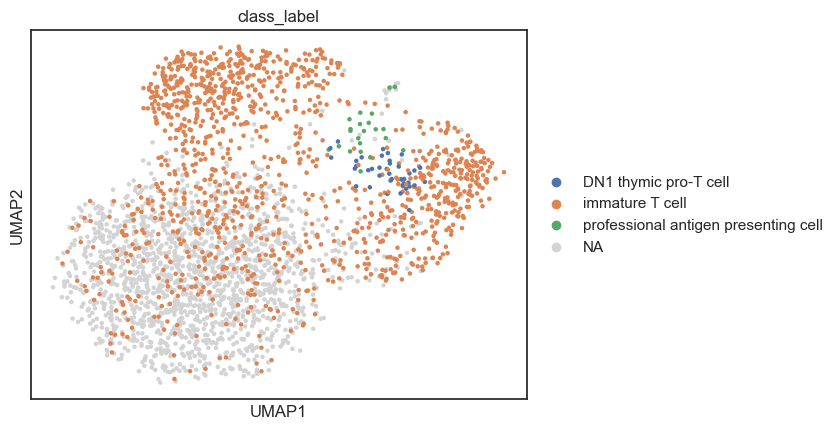

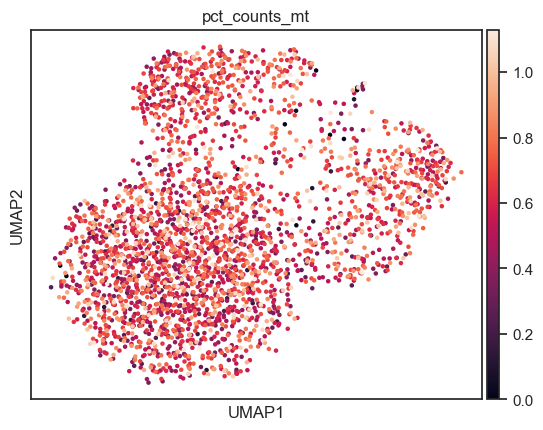

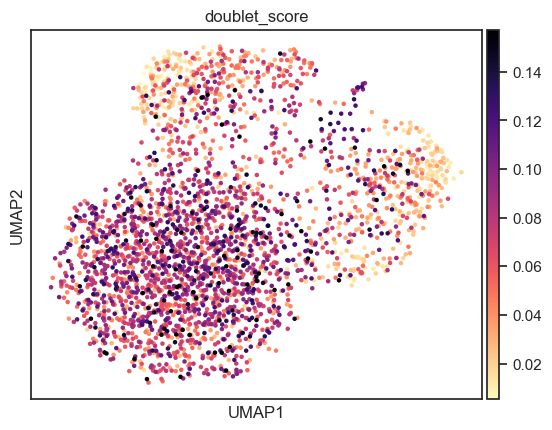

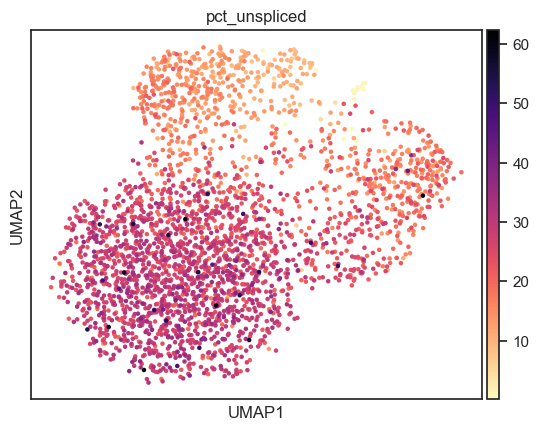

KeyError: 'Could not find key pct_counts_cyt in .var_names or .obs.columns.'

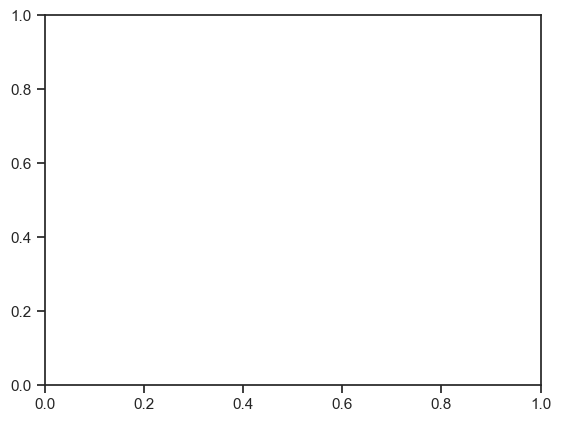

In [91]:
with save_plots_to_pdf(os.path.join(export_plots_directory, 'filtered_umap_mito90_scaled.pdf')):
    sc.pl.umap(adata_merged, color = 'class_label')
    sc.pl.umap(adata_merged, color = 'pct_counts_mt')
    sc.pl.umap(adata_merged, color = 'doublet_score', color_map = 'magma_r')
    sc.pl.umap(adata_merged, color = 'pct_unspliced', color_map = 'magma_r')
    sc.pl.umap(adata_merged, color = 'pct_counts_cyt', color_map = 'magma_r')
    sc.pl.umap(adata_merged, color = 'pct_counts_mem', color_map = 'magma_r')
    sc.pl.umap(adata_merged, color = 'pct_counts_exc', color_map = 'magma_r')

In [92]:
adata_merged

AnnData object with n_obs × n_vars = 2849 × 2099
    obs: 'pct_unspliced', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'total_counts_pl', 'log1p_total_counts_pl', 'pct_counts_pl', 'ori_barcode', 'barcode', 'cell', 'cell_ontology_class', 'class_label', 'leiden'
    var: 'gene_symbols', 'feature_types', 'gene_ids', 'hsapiens_orthologs_id', 'hsapiens_orthologs_name', 'mt', 'ribo', 'tf', 'hb', 'pl', 'rRNA', 'chromosome_loc', 'pcg', 'exc', 'cyt', 'mem', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'norm_variance', 'norm_mean', 'norm_median', 'norm_std